In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs

Data_Set = pd.read_csv("Data_Set_Label_Normalization.csv")

Data_Set_Label = Data_Set['Action']
Data_Set = Data_Set[['X-axis Angular Velocity','Y-axis Angular Velocity','Z-axis Angular Velocity','X-axis Acceleration','Y-axis Acceleration','Z-axis Acceleration','X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']]

# Data_Set['Action'] = Data_Set_Label
Data_Set

X-axis Angular Velocity  Y-axis Angular Velocity  \
0                     0.585974                 0.558023   
1                     0.590232                 0.568828   
2                     0.604023                 0.576542   
3                     0.567940                 0.549999   
4                     0.605088                 0.562037   
...                        ...                      ...   
27572                 0.575360                 0.558332   
27573                 0.629508                 0.567904   
27574                 0.549890                 0.568209   
27575                 0.665592                 0.568828   
27576                 0.529712                 0.560185   

       Z-axis Angular Velocity  X-axis Acceleration  Y-axis Acceleration  \
0                     0.424284             0.418915             0.500327   
1                     0.421940             0.471179             0.463425   
2                     0.423351             0.431287             0.572894   
3                     0.422881             0.454505             0.490137   
4                     0.422411             0.420709             0.515467   
...                        ...                  ...                  ...   
27572                 0.421007             0.394980             0.505786   
27573                 0.420537             0.358315             0.516777   
27574                 0.420067             0.445899             0.518670   
27575                 0.421007             0.400000             0.526166   
27576                 0.423351             0.440610             0.520416   

       Z-axis Acceleration  X-axis Angle  Y-axis Angle  Z-axis Angle  
0                 0.587392      0.466437      0.734749      0.139382  
1                 0.577468      0.417737      0.652647      0.137579  
2                 0.618667      0.536579      0.837403      0.170874  
3                 0.577534      0.452088      0.709959      0.141418  
4                 0.575667      0.484213      0.756366      0.142293  
...                    ...           ...           ...           ...  
27572             0.578255      0.472455      0.743724      0.114576  
27573             0.603373      0.484279      0.755581      0.117165  
27574             0.589684      0.487497      0.763687      0.130912  
27575             0.589160      0.495454      0.768721      0.123964  
27576             0.602063      0.488589      0.766043      0.131997  

[27577 rows x 9 columns]

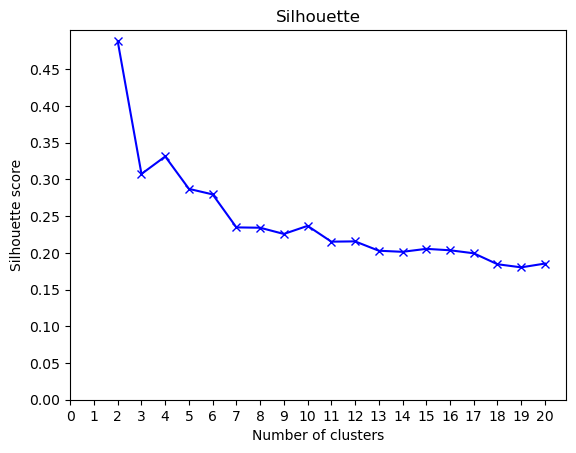

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


# 設定K的範圍
K_range = range(2, 21)

# 儲存每個K的silhouette score
silhouette_scores = []

# 計算每個K的silhouette score
for K in K_range:
    # 建立KMeans模型
    model = KMeans(n_clusters=K, random_state=0)
    # 將資料分成K群
    labels = model.fit_predict(Data_Set)
    # 計算silhouette score
    score = silhouette_score(Data_Set, labels)
    # 儲存silhouette score
    silhouette_scores.append(score)

# 畫出K與silhouette score之間的關係圖
plt.plot(K_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette')
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(0, 0.5, 0.05))
plt.savefig('Silhouette score.png')

plt.show()




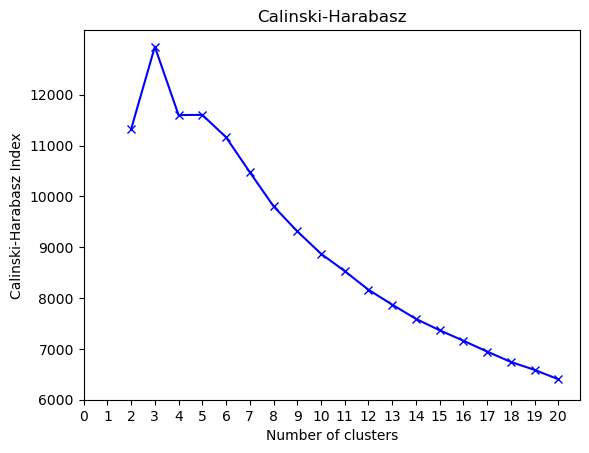

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score
import matplotlib.pyplot as plt

# 儲存每個K的calinski harabasz score
calinski_scores = []

# 設定K的範圍
K_range = range(2, 21)

# 計算每個K的calinski harabasz score
for k in K_range:
    # 建立KMeans模型
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Data_Set)

    # 計算calinski harabasz score
    score = calinski_harabasz_score(Data_Set, kmeans.labels_)

    # 儲存calinski harabasz score
    calinski_scores.append(score)

# 畫出K與calinski harabasz score之間的關係圖
plt.plot(K_range, calinski_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz')
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(6000, 13000, 1000))

plt.savefig('Calinski-Harabasz Index.png')

plt.show()




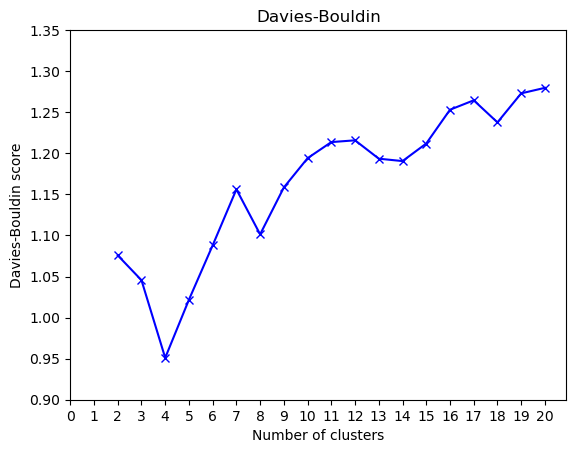

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt

# 載入資料
# X = ...

# 設定K的範圍
K_range = range(2, 21)

# 儲存每個K的davies_bouldin score
davies_bouldin_scores = []

# 計算每個K的davies_bouldin score
for k in K_range:
    # 建立KMeans模型
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Data_Set)

    # 計算davies_bouldin score
    score = davies_bouldin_score(Data_Set, kmeans.labels_)

    # 儲存davies_bouldin score
    davies_bouldin_scores.append(score)

# 畫出K與davies_bouldin score之間的關係圖
plt.plot(K_range, davies_bouldin_scores, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Bouldin score')
plt.title('Davies-Bouldin')
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(0.9, 1.36, 0.05))

plt.savefig('Davies-Bouldin score.png')
plt.show()



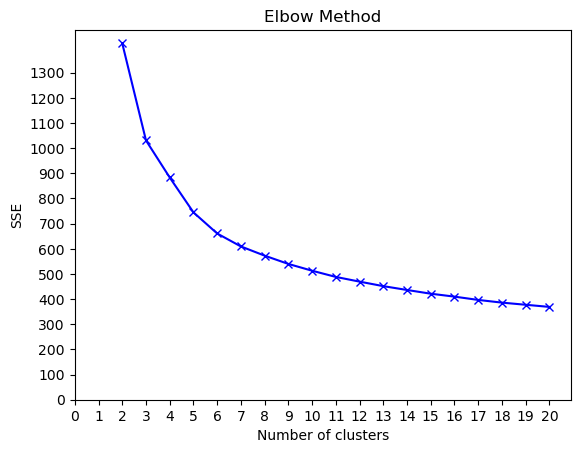

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 設定K的範圍
K_range = range(2, 21)

# 儲存每個K的inertia
inertias = []

# 計算每個K的inertia
for k in K_range:
    # 建立KMeans模型
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(Data_Set)

    # 儲存inertia
    inertias.append(kmeans.inertia_)

# 畫出K與inertia之間的關係圖
plt.plot(K_range, inertias, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.xticks(np.arange(0, 21, 1))
plt.yticks(np.arange(0, 1400, 100))

plt.savefig('Elbow Method.png')
plt.show()




In [6]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt


# # 紅色 (#FF0000)：鮮明的紅色是一個非常容易辨識的顏色，非常適合用於突出重點或吸引注意力。
# # 藍色 (#0000FF)：深藍色可以傳達專業、穩重、信任和冷靜的感覺，因此在商業和科技領域中非常常見。
# # 綠色 (#00FF00)：綠色是一個非常舒適的顏色，通常用於與自然相關的主題，例如生態、健康和可持續發展。
# # 黃色 (#FFFF00)：黃色是一種充滿能量和活力的顏色，非常適合用於表達快樂、創意和創新的主題。
# # 紫色 (#800080)：紫色是一個神秘的顏色，可以傳達智慧、尊貴、浪漫和創造力的感覺，通常用於藝術和文化相關的主題。

        
# x1 = np.arange(len(Data_Set['Z-axis Angular Velocity'][Data_Set['Action']== 'Turn left 1']))
# x2 = np.arange(len(Data_Set['Z-axis Angular Velocity'][Data_Set['Action']== 'Turn right 1']))
# x3 = np.arange(len(Data_Set['Z-axis Angular Velocity'][Data_Set['Action']== 'Idle 1']))
# x4 = np.arange(len(Data_Set['Z-axis Angular Velocity'][Data_Set['Action']== 'Two-stage left turn 1']))
# x5 = np.arange(len(Data_Set['Z-axis Angular Velocity'][Data_Set['Action']== 'U-turn 1']))
# x6 = np.arange(len(Data_Set['Z-axis Angular Velocity'][Data_Set['Action']== 'Go straight 1']))

# plt.figure()
# plt.plot(x1, Data_Set['Z-axis Angular Velocity'][Data_Set['Action']== 'Turn left 1'], c='#FF0000' , label='Turn left 1')
# plt.plot(x2, Data_Set['Z-axis Angular Velocity'][Data_Set['Action']== 'Turn right 1'], c='#0000FF', label='Turn right 1')
# plt.plot(x3//11, Data_Set['Z-axis Angular Velocity'][Data_Set['Action']== 'Idle 1'], c='#00FF00' , label='Idle 1')
# plt.plot(x4, Data_Set['Z-axis Angular Velocity'][Data_Set['Action']== 'Two-stage left turn 1'], c='#FFFF00', label='Two-stage left turn 1')
# plt.plot(x5, Data_Set['Z-axis Angular Velocity'][Data_Set['Action']== 'U-turn 1'], c='#800080' , label='U-turn 1')
# plt.plot(x6, Data_Set['Z-axis Angular Velocity'][Data_Set['Action']== 'Go straight 1'], c='#FFA500' , label='Go straight 1')

# plt.legend(loc='best',bbox_to_anchor=(1.05, 1))

# plt.title('High Action')



# # plt.savefig('Normalization + Z角速度_判斷行為_update'+'.png')


In [7]:
# import matplotlib.pyplot as plt
# Action=['Turn left 1', 'Turn right 1', 'Idle 1', 'Go straight 1', 'Two-stage left turn 1', 'U-turn 1']
# # 創建一個大小為 (10, 6) 的圖
# fig, ax = plt.subplots(figsize=(10, 6))

# # 按照Action分別繪製折線圖
# for action in Action:
#     df = Data_Set[Data_Set['Action'] == action]
#     ax.plot(df.index, df['Z-axis Angular Velocity'], label=action)

# # 設置圖的標題和標籤
# ax.set_title('Z-axis Angular Velocity for Different Actions')
# ax.set_xlabel('Time')
# ax.set_ylabel('Z-axis Angular Velocity')

# # 設置圖例
# ax.legend()

# # 顯示圖
# plt.show()


In [8]:
# import pandas as pd
# import matplotlib.pyplot as plt
# import numpy as np

# # 假設你的資料存在名為Data_Set的Pandas DataFrame中，並且有以下欄位：
# # 'Action' : 動作名稱
# # 'Timestamp' : 時間戳記
# # 'Z-axis Angular Velocity' : Z軸角速度

# # 找到所有動作名稱
# actions = Data_Set['Action'].unique()

# # 找到所有動作的最小時間戳記和最大時間戳記
# min_timestamp = Data_Set['Timestamp'].min()
# max_timestamp = Data_Set['Timestamp'].max()

# # 計算出每個時間步長度的大小
# time_step = 100

# # 創建一個新的DataFrame，包含所有動作在時間序列上的角速度
# df = pd.DataFrame(columns=actions)

# # 對每個動作進行處理
# for action in actions:
#     # 從原始數據中找到該動作的所有時間戳記和角速度數據
#     action_df = Data_Set[Data_Set['Action'] == action][['Timestamp', 'Z-axis Angular Velocity']]
#     # 將時間戳記轉換成以最小時間戳記為0的相對時間
#     action_df['Timestamp'] = action_df['Timestamp'] - min_timestamp
#     # 將時間戳記除以時間步長，向下取整
#     action_df['Timestamp'] = action_df['Timestamp'] // time_step
#     # 將角速度數據填入新的DataFrame中
#     df[action] = action_df.groupby('Timestamp').mean()['Z-axis Angular Velocity']

# # 填補缺失的值
# df.fillna(method='ffill', inplace=True)

# # 計算時間序列的長度
# length = len(df.index)

# # 創建一個大小為 (10, 6) 的圖
# fig, ax = plt.subplots(figsize=(10, 6))

# # 繪製折線圖
# for action in actions:
#     ax.plot(np.arange(length), df[action], label=action)

# # 設置圖的標題和標籤
# ax.set_title('Z-axis Angular Velocity for Different Actions')
# ax.set_xlabel('Time')
# ax.set_ylabel('Z-axis Angular Velocity')

# # 設置圖例
# ax.legend()

# # 顯示圖
# plt.show()


In [9]:
# Data_Set['Action'].unique()

In [10]:
#############################
# k-mean分群 5
#############################

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


Data_Set = pd.read_csv("Data_Set_Label_Normalization.csv")

Data_Set_Label = Data_Set['Action']
Data_Set = Data_Set[['X-axis Angular Velocity','Y-axis Angular Velocity','Z-axis Angular Velocity','X-axis Acceleration','Y-axis Acceleration','Z-axis Acceleration','X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']]



# 建立 KMeans 模型並進行分群
kmeans = KMeans(n_clusters=5)
kmeans.fit(Data_Set)
labels = kmeans.labels_


Data_Set['Base Action'] = labels
Data_Set['Action'] = Data_Set_Label

In [93]:
Data_Set.to_csv('20230501_DataSet_5cluster.csv')

In [11]:
Data_Set_Left = Data_Set[Data_Set['Action'] == 'Turn left 1']
Data_Set_Right = Data_Set[Data_Set['Action'] == 'Turn right 1']
Data_Set_Idle = Data_Set[Data_Set['Action'] == 'Idle 1']
Data_Set_Two = Data_Set[Data_Set['Action'] == 'Two-stage left turn 1']
Data_Set_U = Data_Set[Data_Set['Action'] == 'U-turn 1']
Data_Set_Go = Data_Set[Data_Set['Action'] == 'Go straight 1']

# 左右轉  （不相似）

# 角速度

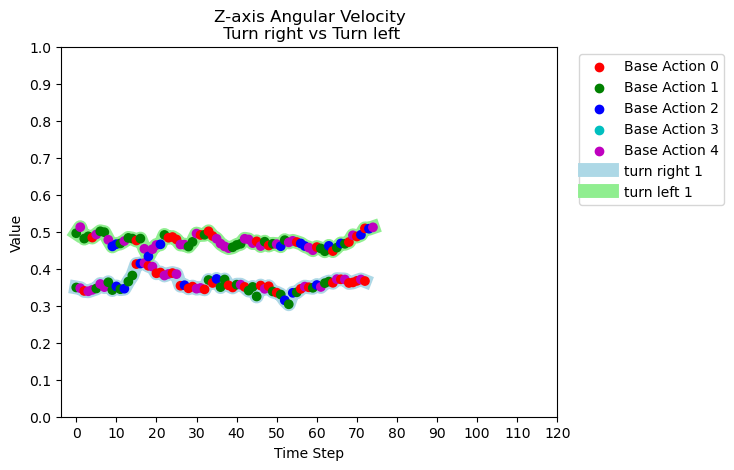

In [12]:
#  Z軸角速度


# colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm', 5: 'y', 6: 'k', 7: 'orange', 8: 'purple'}
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}
X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))




for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('Z-axis Angular Velocity\n Turn right vs Turn left')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Z-axis Angular Velocity\n Turn right vs Turn left.png')
plt.show()



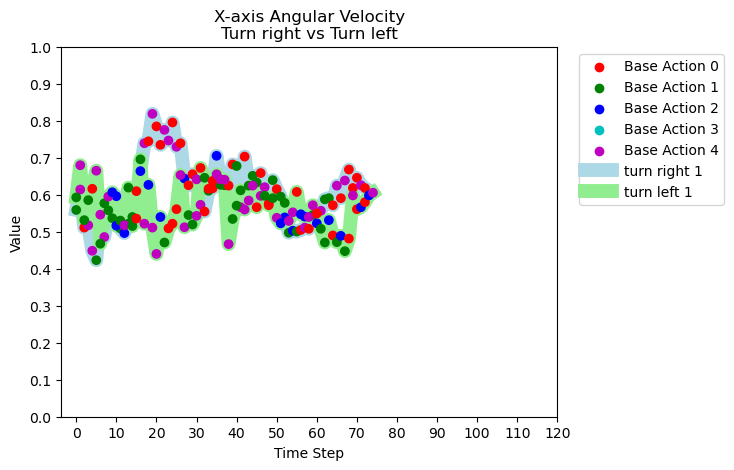

In [13]:
#  X軸角速度


colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('X-axis Angular Velocity\nTurn right vs Turn left')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.savefig('X-axis Angular Velocity Turn right vs Turn left.png')
plt.show()


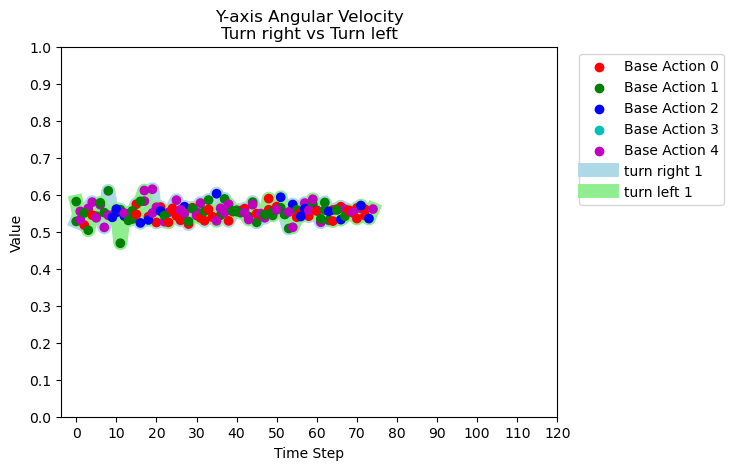

In [14]:
#  Y軸角速度


colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('Y-axis Angular Velocity\nTurn right vs Turn left')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.savefig('Y-axis Angular Velocity Turn right vs Turn left.png')
plt.show()


# 加速度

In [15]:
Data_Set_Right.columns

Index(['X-axis Angular Velocity', 'Y-axis Angular Velocity',
       'Z-axis Angular Velocity', 'X-axis Acceleration', 'Y-axis Acceleration',
       'Z-axis Acceleration', 'X-axis Angle', 'Y-axis Angle', 'Z-axis Angle',
       'Base Action', 'Action'],
      dtype='object')

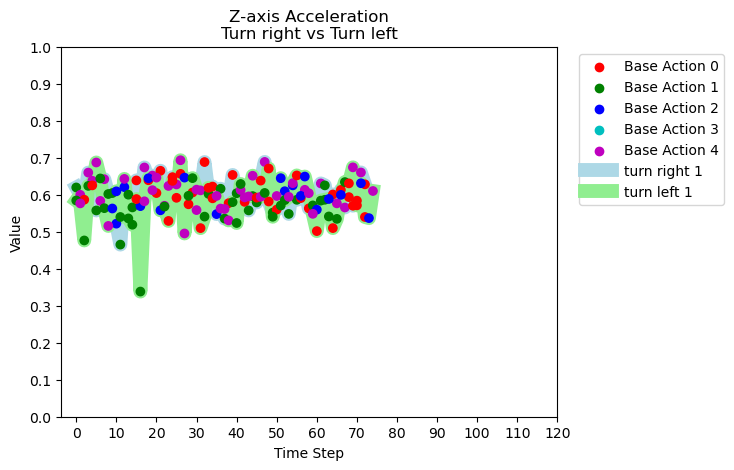

In [16]:
#  Z軸加速度


# colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm', 5: 'y', 6: 'k', 7: 'orange', 8: 'purple'}
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}
X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))




for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('Z-axis Acceleration\nTurn right vs Turn left')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.savefig('Z-axis Acceleration Turn right vs Turn left.png')
plt.show()



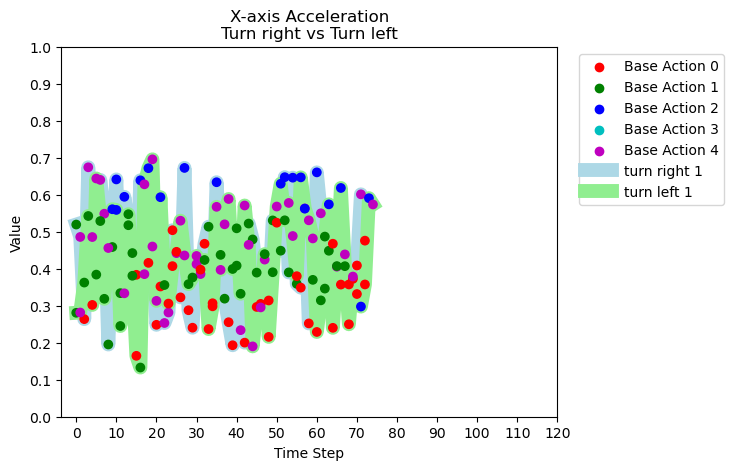

In [17]:
#  X軸加速度


colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('X-axis Acceleration\nTurn right vs Turn left')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.savefig('X-axis Acceleration Turn right vs Turn left.png')
plt.show()



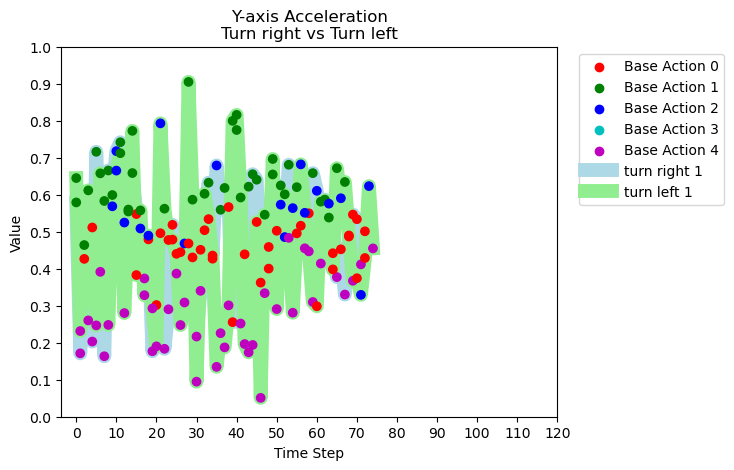

In [18]:
#  Y軸加速度


colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('Y-axis Acceleration\nTurn right vs Turn left')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.savefig('Y-axis Acceleration Turn right vs Turn left.png')
plt.show()



# 角度

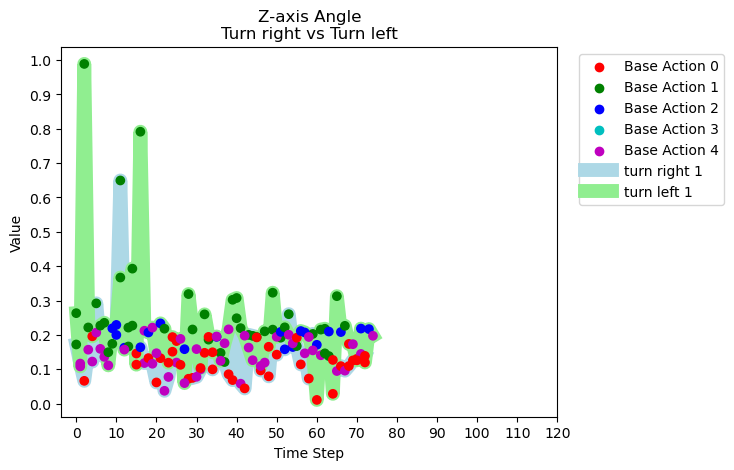

In [19]:
#  Z角度


# colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm', 5: 'y', 6: 'k', 7: 'orange', 8: 'purple'}
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}
X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))




for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('Z-axis Angle\nTurn right vs Turn left')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.savefig('Z-axis Angle Turn right vs Turn left.png')
plt.show()



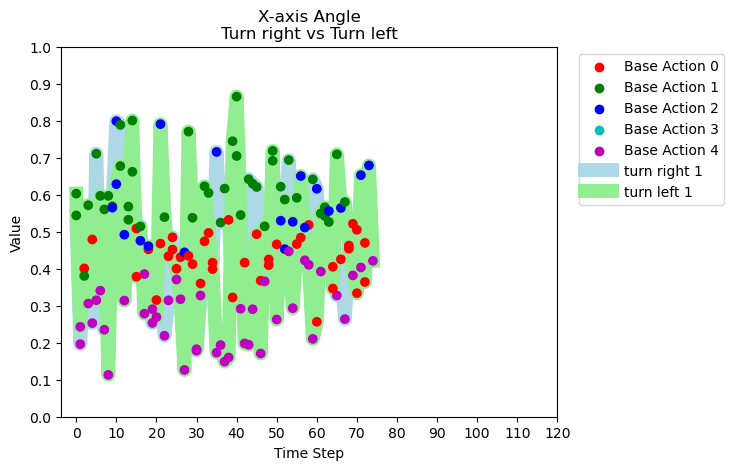

In [20]:
#  X角度


# colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm', 5: 'y', 6: 'k', 7: 'orange', 8: 'purple'}
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}
X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))




for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('X-axis Angle\nTurn right vs Turn left')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.savefig('X-axis Angle Turn right vs Turn left.png')
plt.show()



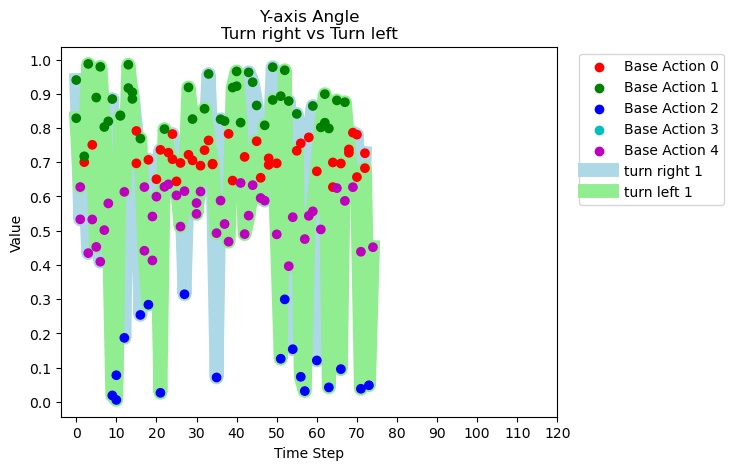

In [21]:
#  Y角度


# colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm', 5: 'y', 6: 'k', 7: 'orange', 8: 'purple'}
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}
X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Left = np.arange(len(Data_Set_Left))




for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightGreen' , label='turn left 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))
plt.title('Y-axis Angle\nTurn right vs Turn left')

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')
plt.savefig('Y-axis Angle Turn right vs Turn left.png')
plt.show()



# 右轉跟迴轉  (不相似)

# 角速度

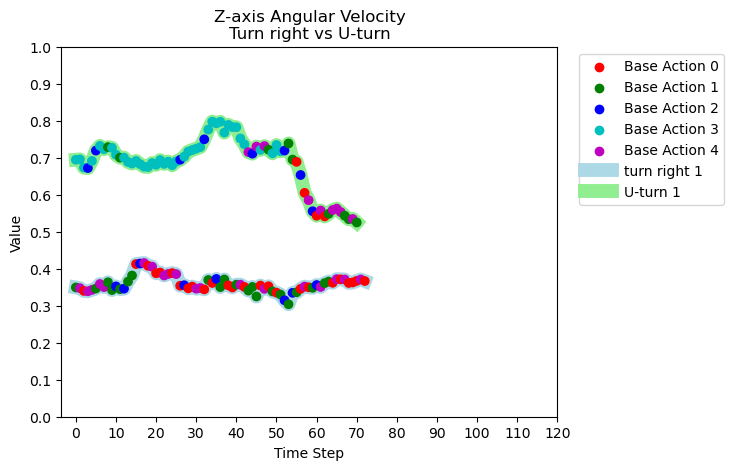

In [22]:
#Z軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Z-axis Angular Velocity'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Z-axis Angular Velocity\nTurn right vs U-turn')
plt.savefig('Z-axis Angular Velocity Turn right vs U-turn.png')
plt.show()



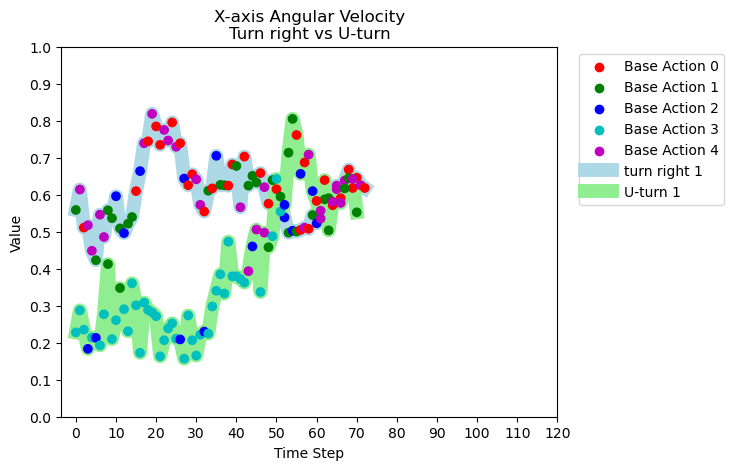

In [23]:
#X軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['X-axis Angular Velocity'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('X-axis Angular Velocity\nTurn right vs U-turn')
plt.savefig('X-axis Angular Velocity Turn right vs U-turn.png')
plt.show()



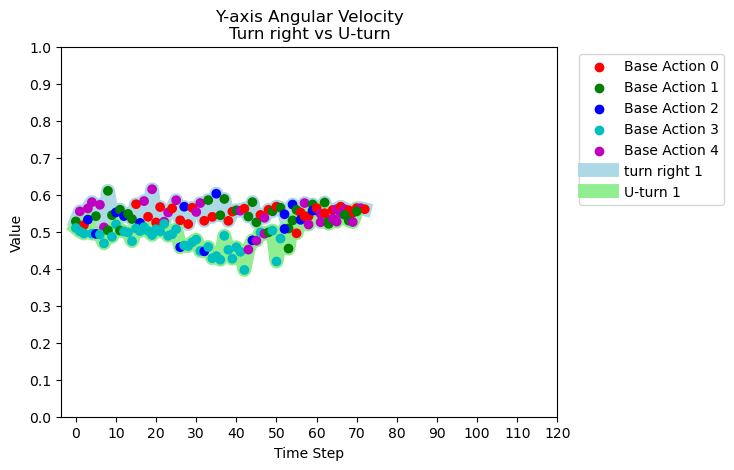

In [24]:
#Y軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Y-axis Angular Velocity'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Y-axis Angular Velocity\nTurn right vs U-turn')
plt.savefig('Y-axis Angular Velocity Turn right vs U-turn.png')
plt.show()



# 加速度

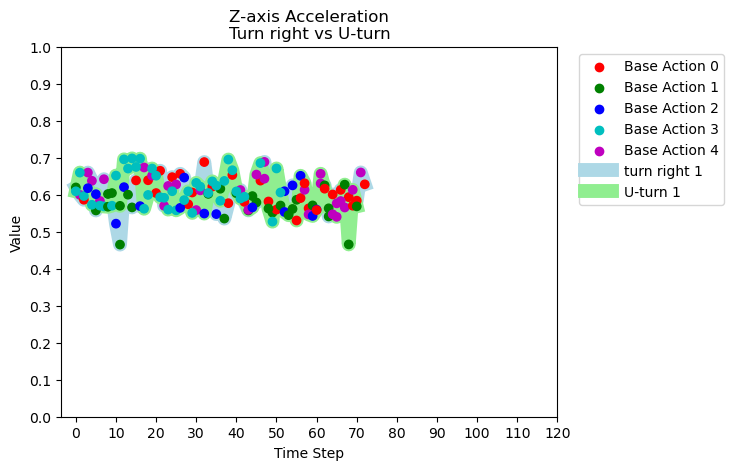

In [25]:
#Z軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Z-axis Acceleration'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Z-axis Acceleration\nTurn right vs U-turn')
plt.savefig('Z-axis Acceleration Turn right vs U-turn.png')
plt.show()



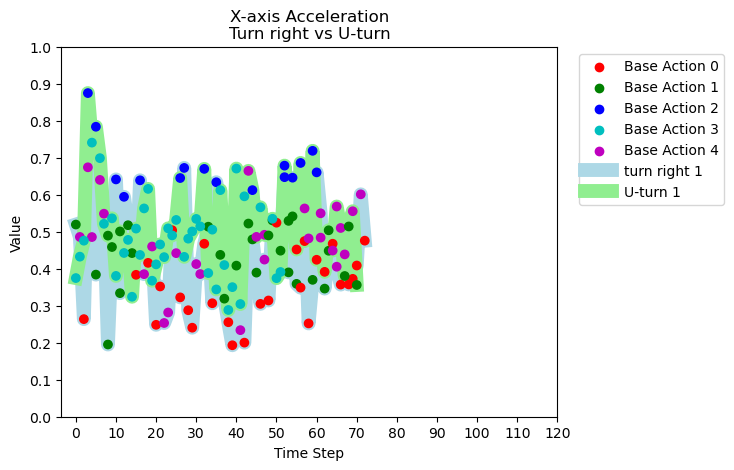

In [26]:
#X軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['X-axis Acceleration'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['X-axis Acceleration'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('X-axis Acceleration\nTurn right vs U-turn')
plt.savefig('X-axis Acceleration Turn right vs U-turn.png')
plt.show()



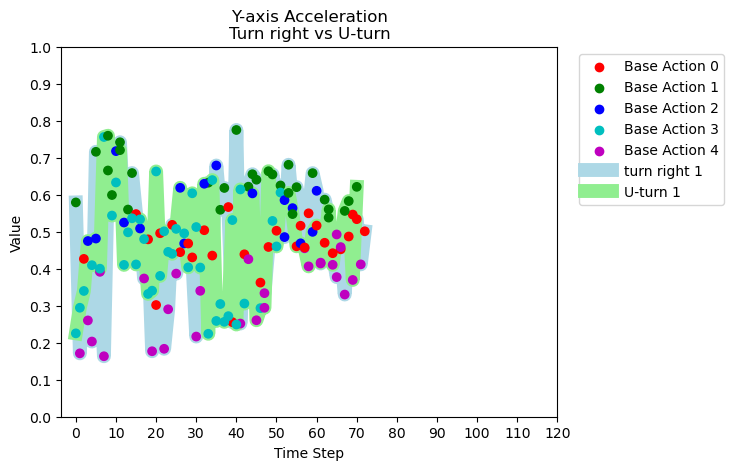

In [27]:
#Y軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Y-axis Acceleration'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Y-axis Acceleration\nTurn right vs U-turn')
plt.savefig('Y-axis Acceleration Turn right vs U-turn.png')
plt.show()



# 角度

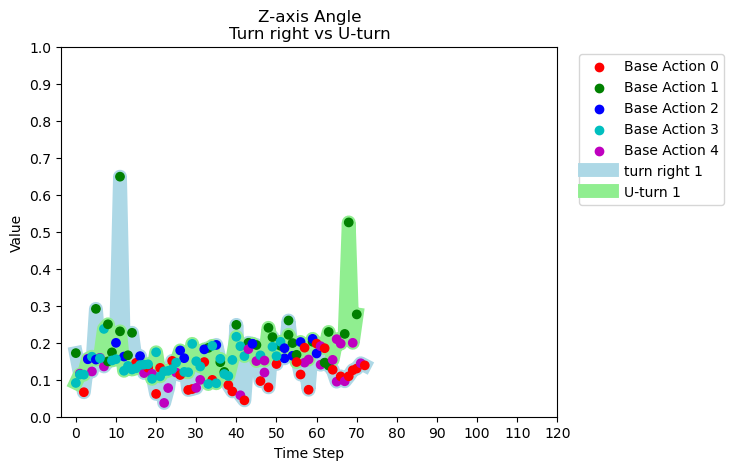

In [28]:
#Z軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Z-axis Angle'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Z-axis Angle'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Z-axis Angle\nTurn right vs U-turn')
plt.savefig('Z-axis Angle Turn right vs U-turn.png')
plt.show()



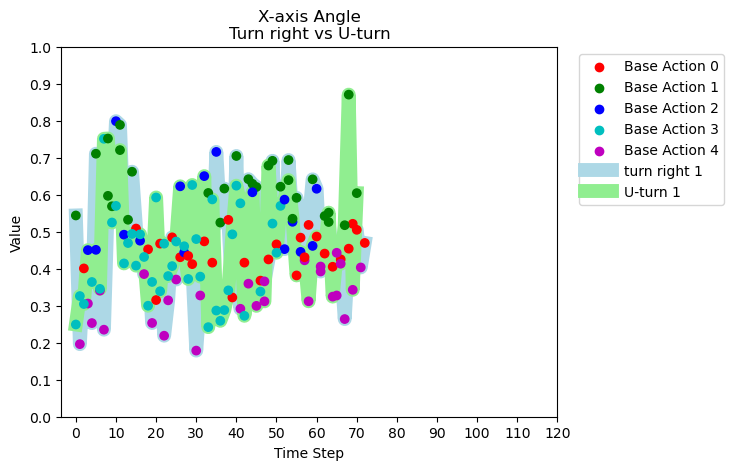

In [29]:
#X軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['X-axis Angle'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['X-axis Angle'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('X-axis Angle\nTurn right vs U-turn')
plt.savefig('X-axis Angle Turn right vs U-turn.png')
plt.show()



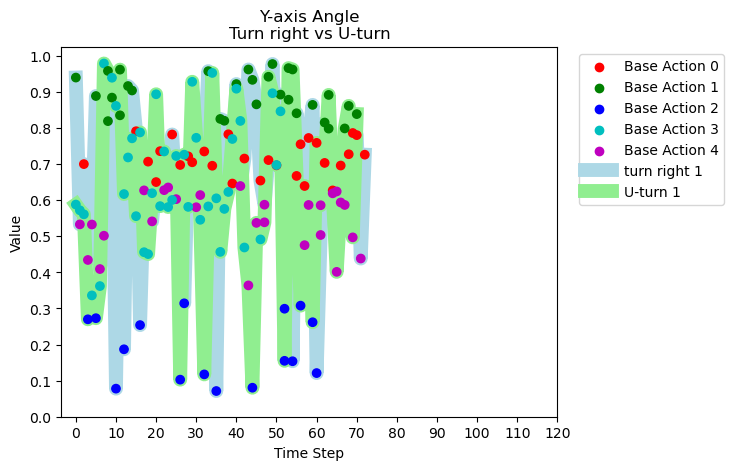

In [30]:
#Y軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Y-axis Angle'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Y-axis Angle'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Y-axis Angle\nTurn right vs U-turn')
plt.savefig('Y-axis Angle Turn right vs U-turn.png')
plt.show()



# 右轉跟待轉

# 角速度

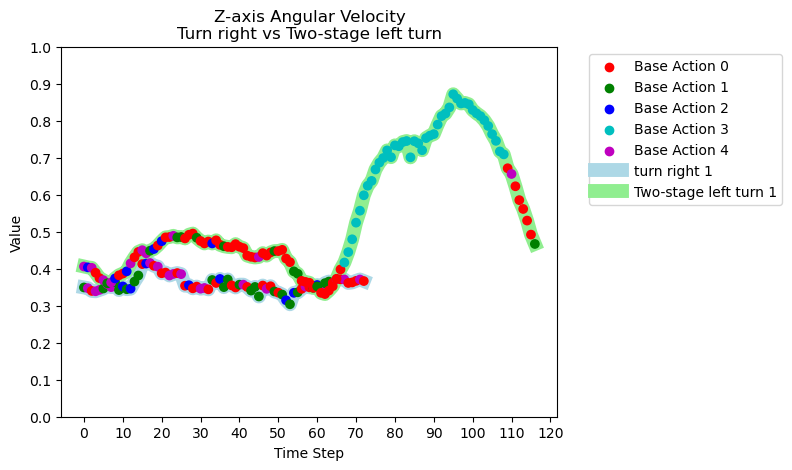

In [31]:
# z軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Z-axis Angular Velocity'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.05, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')


plt.title('Z-axis Angular Velocity\nTurn right vs Two-stage left turn')
plt.savefig('Z-axis Angular Velocity Turn right vs Two-stage left turn.png')
plt.show()




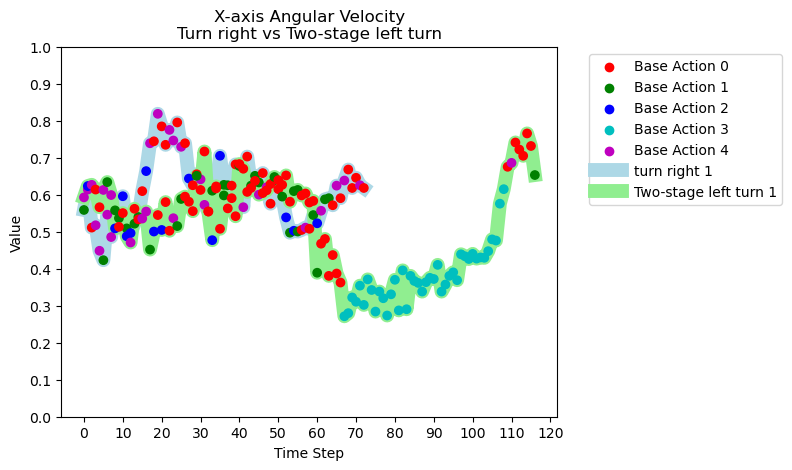

In [32]:
# X軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['X-axis Angular Velocity'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.05, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('X-axis Angular Velocity\nTurn right vs Two-stage left turn')
plt.savefig('X-axis Angular Velocity Turn right vs Two-stage left turn.png')
plt.show()



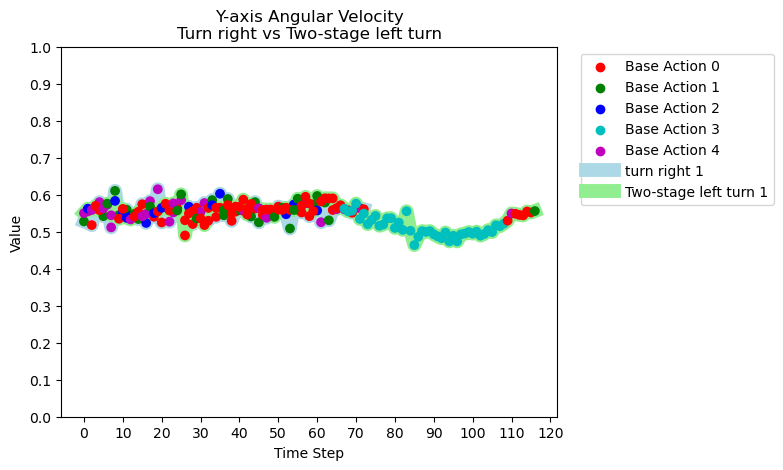

In [33]:
# Y軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Angular Velocity'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Y-axis Angular Velocity'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Y-axis Angular Velocity\nTurn right vs Two-stage left turn')
plt.savefig('Y-axis Angular Velocity Turn right vs Two-stage left turn.png')
plt.show()



# 加速度

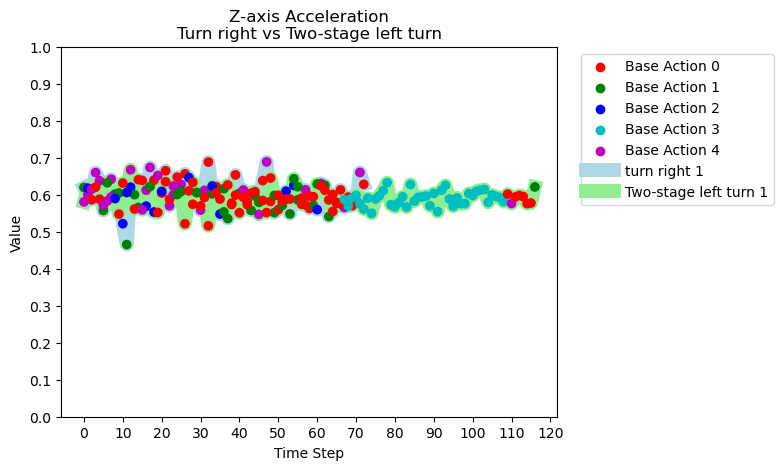

In [34]:
# z軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Z-axis Acceleration'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Z-axis Acceleration\nTurn right vs Two-stage left turn')
plt.savefig('Z-axis Acceleration Turn right vs Two-stage left turn.png')
plt.show()



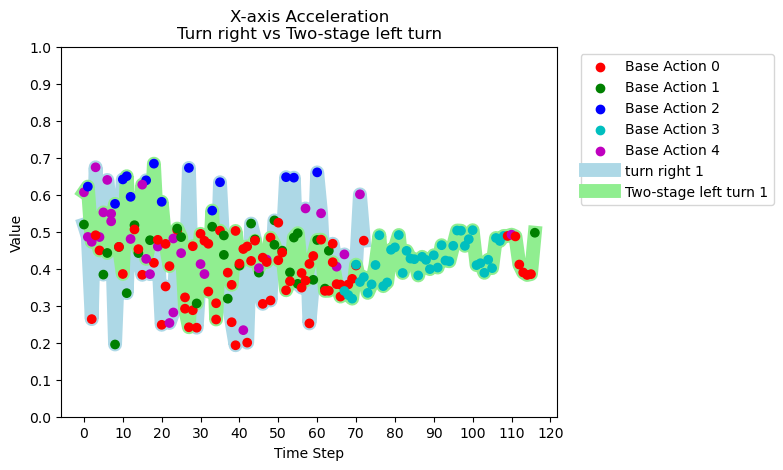

In [35]:
# X軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['X-axis Acceleration'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('X-axis Acceleration\nTurn right vs Two-stage left turn')
plt.savefig('X-axis Acceleration Turn right vs Two-stage left turn.png')
plt.show()



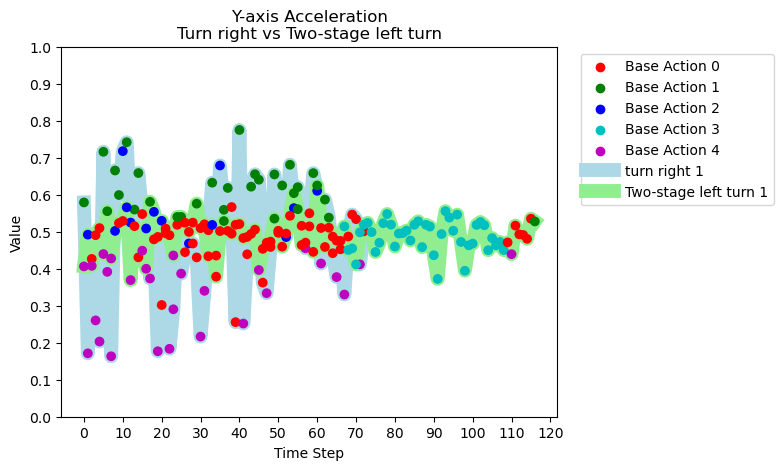

In [36]:
# Y軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Acceleration'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Y-axis Acceleration'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Y-axis Acceleration\nTurn right vs Two-stage left turn')
plt.savefig('Y-axis Acceleration Turn right vs Two-stage left turn.png')
plt.show()



# 角度

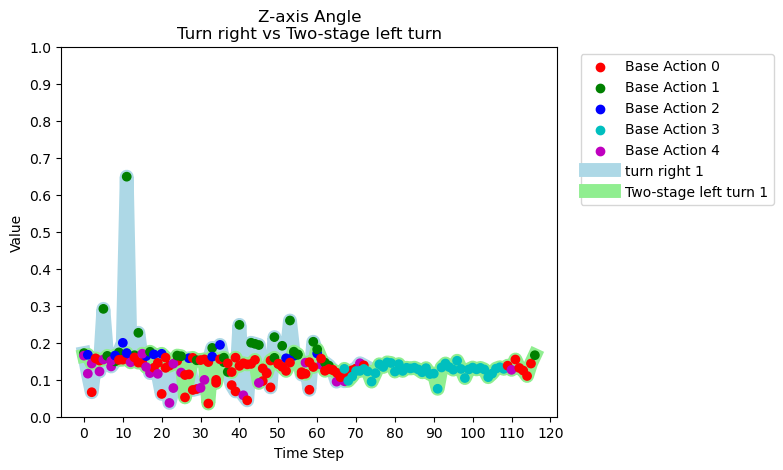

In [37]:
# z軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Z-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Z-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Z-axis Angle'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Z-axis Angle'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Z-axis Angle\nTurn right vs Two-stage left turn')
plt.savefig('Z-axis Angle Turn right vs Two-stage left turn.png')
plt.show()




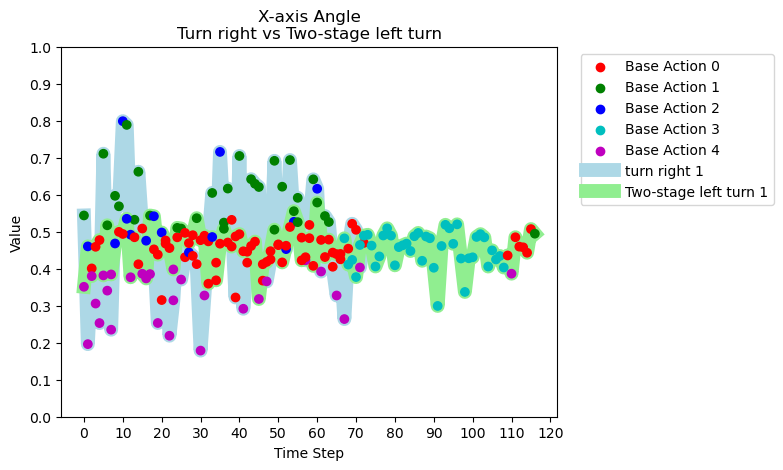

In [38]:
# X軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['X-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['X-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['X-axis Angle'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['X-axis Angle'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('X-axis Angle\nTurn right vs Two-stage left turn')
plt.savefig('X-axis Angle Turn right vs Two-stage left turn.png')
plt.show()



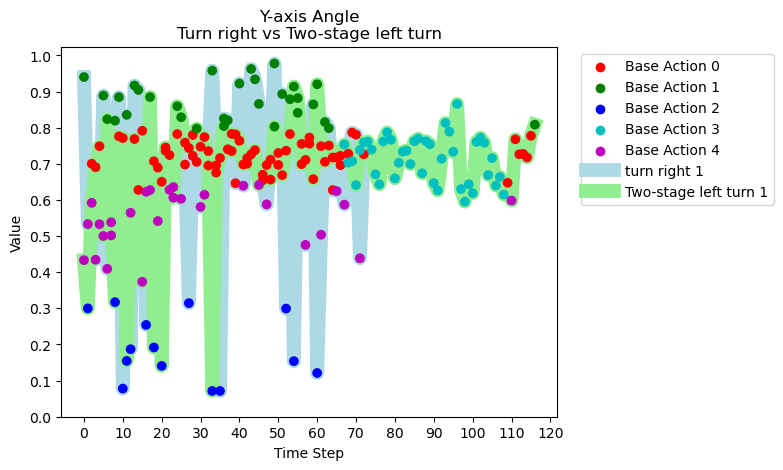

In [39]:
# Y軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Right = np.arange(len(Data_Set_Right))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Right, Data_Set_Right['Y-axis Angle'], c=[colors[x] for x in Data_Set_Right['Base Action']], zorder=2)
plt.plot(X_Data_Set_Right, Data_Set_Right['Y-axis Angle'][Data_Set_Right['Action'] == 'Turn right 1'], c='LightBlue' , label='turn right 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Y-axis Angle'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Y-axis Angle'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Y-axis Angle\nTurn right vs Two-stage left turn')
plt.savefig('Y-axis Angle Turn right vs Two-stage left turn.png')
plt.show()



# 左轉與迴轉

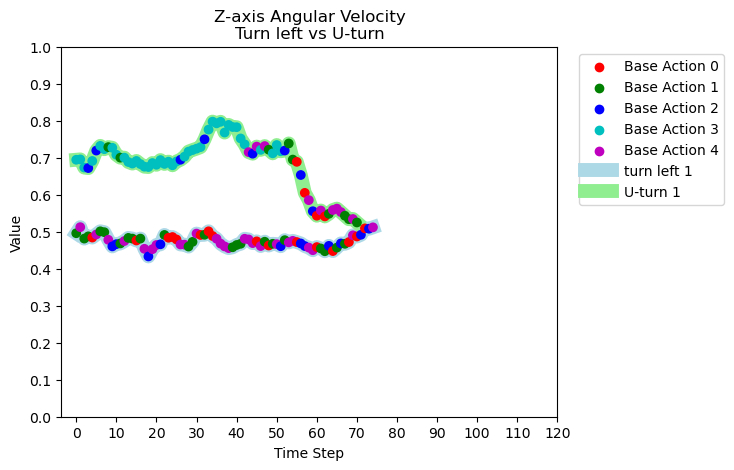

In [40]:
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Z-axis Angular Velocity'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')


plt.title('Z-axis Angular Velocity\nTurn left vs U-turn')
plt.savefig('Z-axis Angular Velocity Turn left vs U-turn.png')
plt.show()



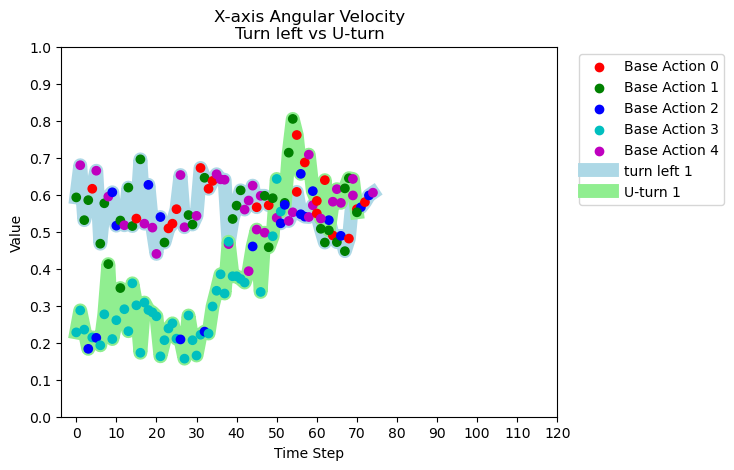

In [41]:
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['X-axis Angular Velocity'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')


plt.title('X-axis Angular Velocity\nTurn left vs U-turn')
plt.savefig('X-axis Angular Velocity Turn left vs U-turn.png')
plt.show()



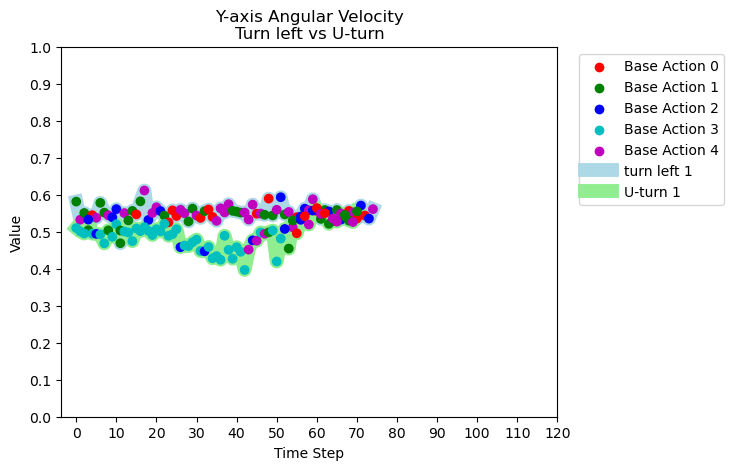

In [42]:
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Y-axis Angular Velocity'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')


plt.title('Y-axis Angular Velocity\nTurn left vs U-turn')
plt.savefig('Y-axis Angular Velocity Turn left vs U-turn.png')
plt.show()



# 加速度

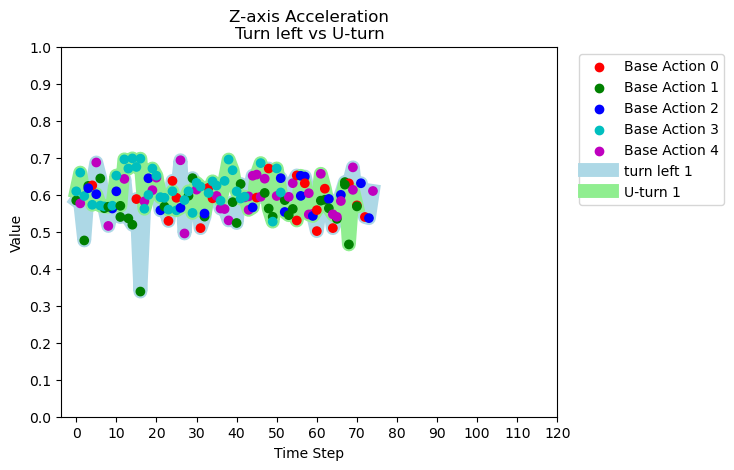

In [43]:
#Z軸
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Z-axis Acceleration'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Z-axis Acceleration\nTurn left vs U-turn')
plt.savefig('Z-axis Acceleration Turn left vs U-turn.png')
plt.show()



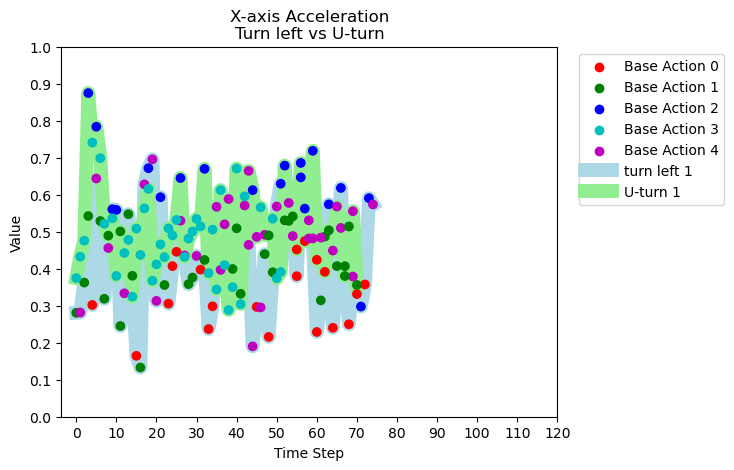

In [44]:
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['X-axis Acceleration'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['X-axis Acceleration'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')


plt.title('X-axis Acceleration\nTurn left vs U-turn')
plt.savefig('X-axis Acceleration Turn left vs U-turn.png')
plt.show()



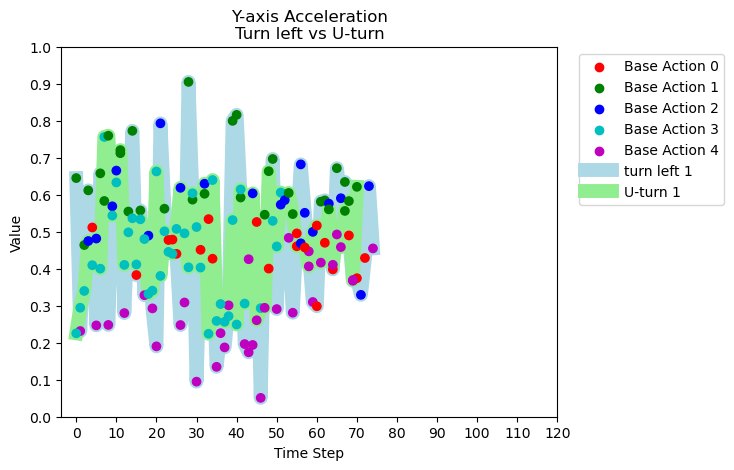

In [45]:
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Y-axis Acceleration'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')


plt.title('Y-axis Acceleration\nTurn left vs U-turn')
plt.savefig('Y-axis Acceleration Turn left vs U-turn.png')
plt.show()



# 角度

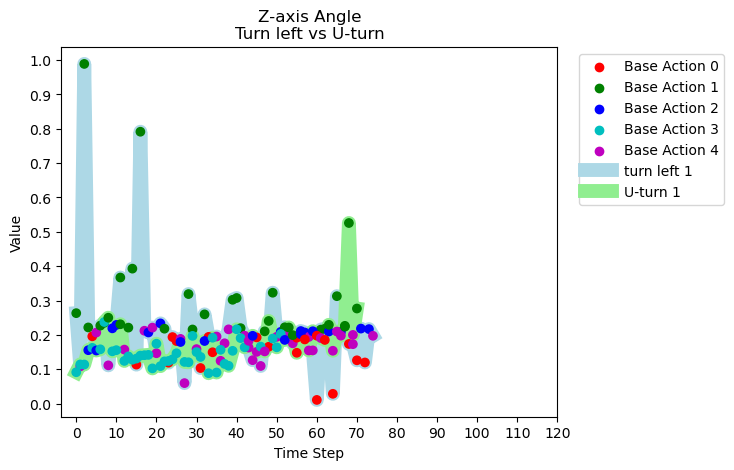

In [46]:
#Z軸
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Z-axis Angle'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Z-axis Angle'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')


plt.title('Z-axis Angle\nTurn left vs U-turn')
plt.savefig('Z-axis Angle Turn left vs U-turn.png')
plt.show()



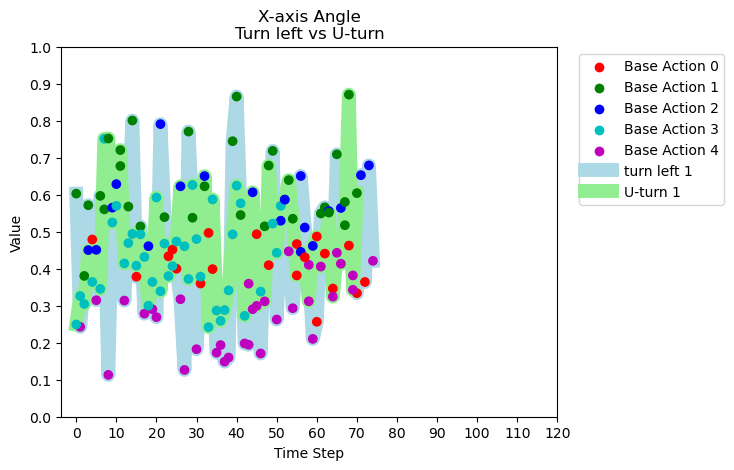

In [47]:
#X軸
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['X-axis Angle'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['X-axis Angle'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')


plt.title('X-axis Angle\nTurn left vs U-turn')
plt.savefig('X-axis Angle Turn left vs U-turn.png')
plt.show()



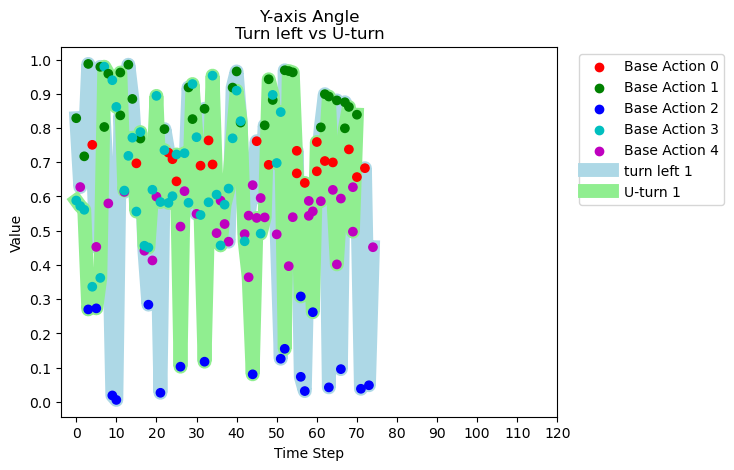

In [48]:
#Y軸
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_U = np.arange(len(Data_Set_U))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_U, Data_Set_U['Y-axis Angle'], c=[colors[x] for x in Data_Set_U['Base Action']], zorder=2)
plt.plot(X_Data_Set_U, Data_Set_U['Y-axis Angle'][Data_Set_U['Action'] == 'U-turn 1'], c='LightGreen' , label='U-turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')


plt.title('Y-axis Angle\nTurn left vs U-turn')
plt.savefig('Y-axis Angle Turn left vs U-turn.png')
plt.show()



# 左轉與待轉

# 角速度

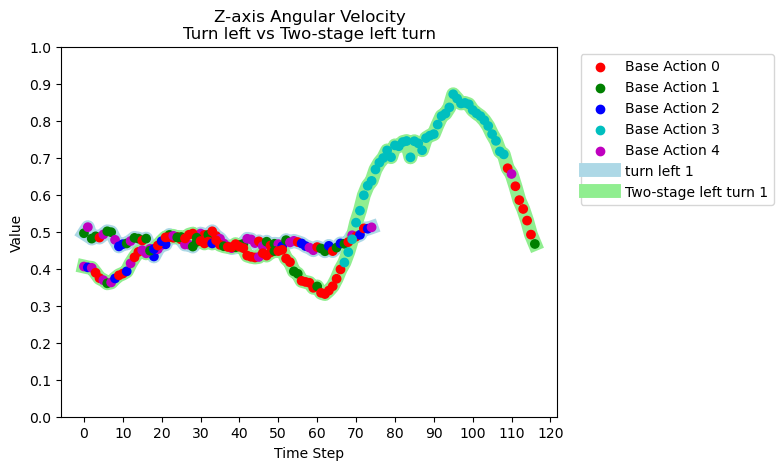

In [49]:
#Z軸
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Z-axis Angular Velocity'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Z-axis Angular Velocity\nTurn left vs Two-stage left turn')
plt.savefig('Z-axis Angular Velocity Turn left vs Two-stage left turn.png')
plt.show()



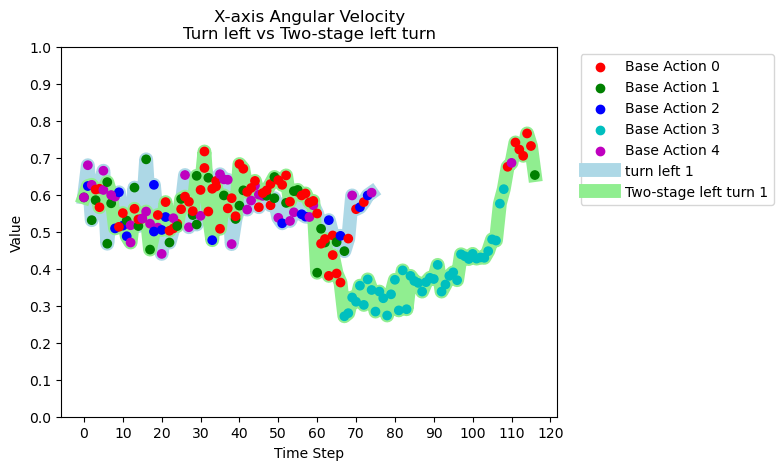

In [50]:
#X軸
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['X-axis Angular Velocity'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('X-axis Angular Velocity\nTurn left vs Two-stage left turn')
plt.savefig('X-axis Angular Velocity Turn left vs Two-stage left turn.png')
plt.show()



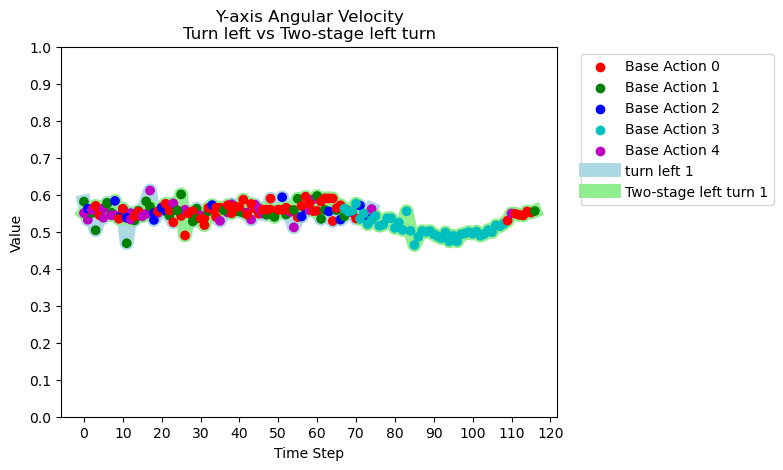

In [51]:
#Y軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Angular Velocity'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Y-axis Angular Velocity'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Y-axis Angular Velocity\nTurn left vs Two-stage left turn')
plt.savefig('Y-axis Angular Velocity Turn left vs Two-stage left turn.png')
plt.show()



# 加速度

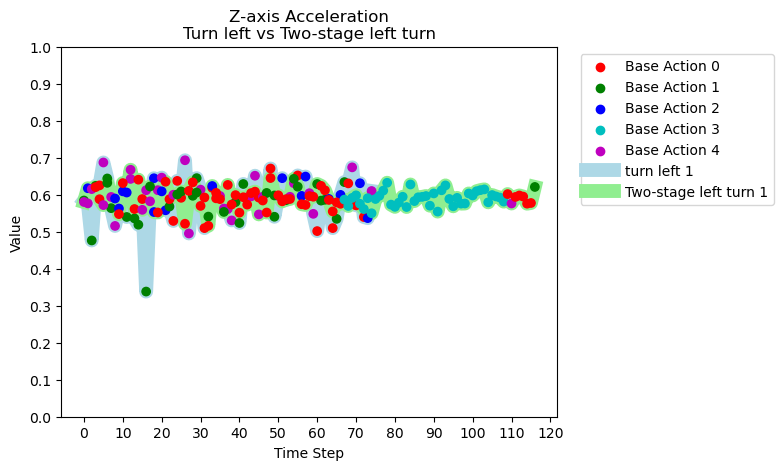

In [52]:
#Z軸
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Z-axis Acceleration'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Z-axis Acceleration\nTurn left vs Two-stage left turn')
plt.savefig('Z-axis Acceleration Turn left vs Two-stage left turn.png')
plt.show()



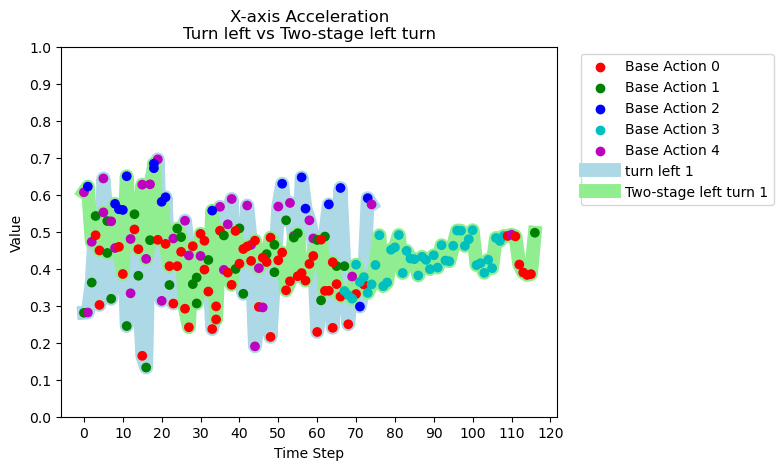

In [53]:
#X軸
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['X-axis Acceleration'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('X-axis Acceleration\nTurn left vs Two-stage left turn')
plt.savefig('X-axis Acceleration Turn left vs Two-stage left turn.png')
plt.show()



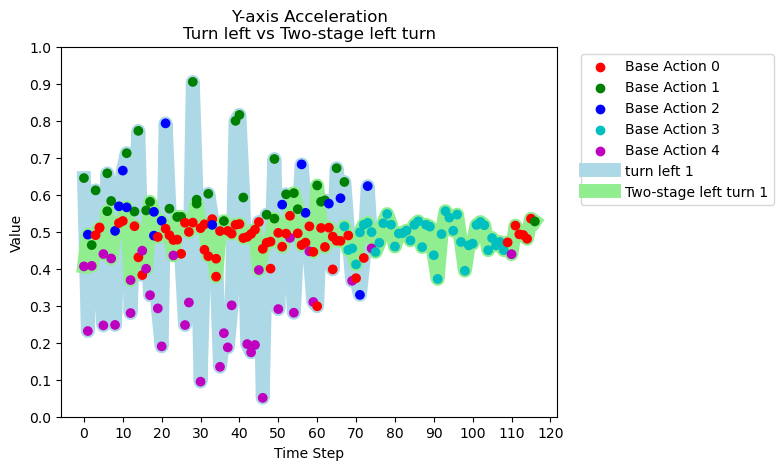

In [54]:
#Y軸
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Acceleration'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Y-axis Acceleration'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Y-axis Acceleration\nTurn left vs Two-stage left turn')
plt.savefig('Y-axis Acceleration Turn left vs Two-stage left turn.png')
plt.show()



# 角度

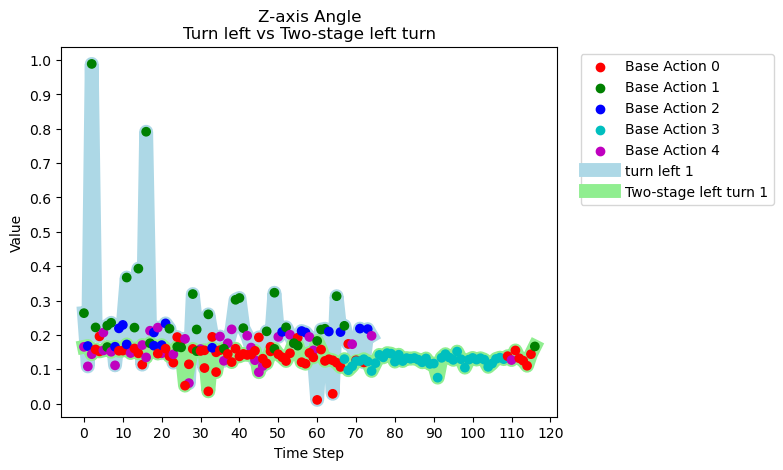

In [55]:
#z軸
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Z-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Z-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Z-axis Angle'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Z-axis Angle'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Z-axis Angle\nTurn left vs Two-stage left turn')
plt.savefig('Z-axis Angle Turn left vs Two-stage left turn.png')
plt.show()



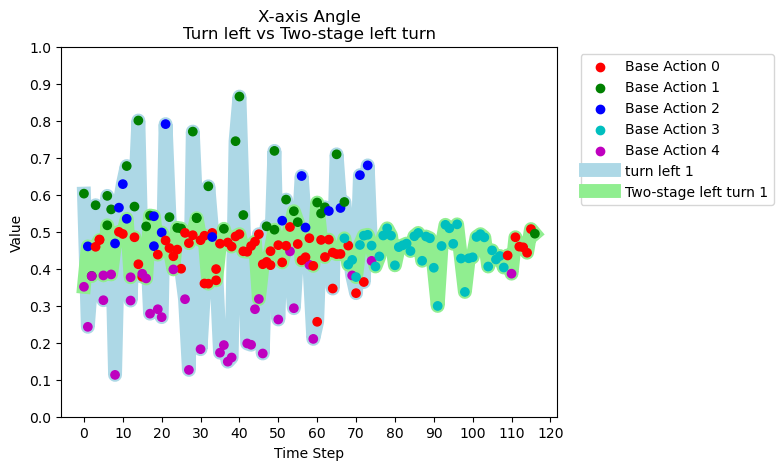

In [56]:
#X軸
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['X-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['X-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['X-axis Angle'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['X-axis Angle'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('X-axis Angle\nTurn left vs Two-stage left turn')
plt.savefig('X-axis Angle Turn left vs Two-stage left turn.png')
plt.show()



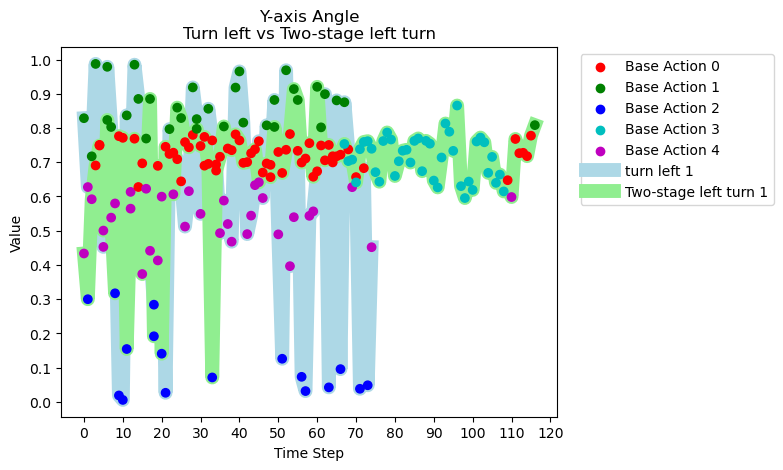

In [57]:
#Y軸
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Left = np.arange(len(Data_Set_Left))
X_Data_Set_Two = np.arange(len(Data_Set_Two))



for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Left, Data_Set_Left['Y-axis Angle'], c=[colors[x] for x in Data_Set_Left['Base Action']], zorder=2)
plt.plot(X_Data_Set_Left, Data_Set_Left['Y-axis Angle'][Data_Set_Left['Action'] == 'Turn left 1'], c='LightBlue' , label='turn left 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Two, Data_Set_Two['Y-axis Angle'], c=[colors[x] for x in Data_Set_Two['Base Action']], zorder=2)
plt.plot(X_Data_Set_Two, Data_Set_Two['Y-axis Angle'][Data_Set_Two['Action'] == 'Two-stage left turn 1'], c='LightGreen' , label='Two-stage left turn 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.45, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Y-axis Angle\nTurn left vs Two-stage left turn')
plt.savefig('Y-axis Angle Turn left vs Two-stage left turn.png')
plt.show()



# 怠速與直行

# 角速度

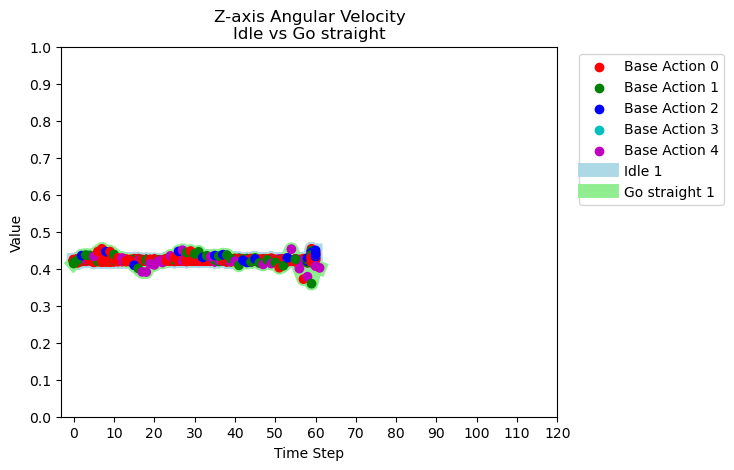

In [58]:
# Z軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['Z-axis Angular Velocity'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['Z-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['Z-axis Angular Velocity'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Z-axis Angular Velocity\nIdle vs Go straight')
plt.savefig('Z-axis Angular Velocity Idle vs Go straight.png')
plt.show()



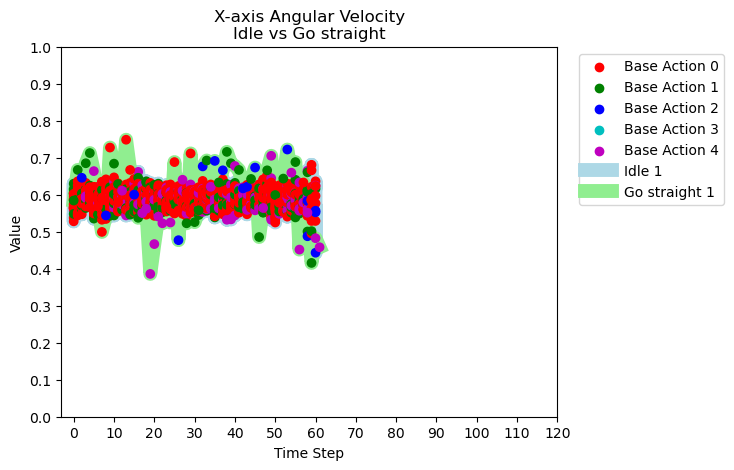

In [59]:
# X軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['X-axis Angular Velocity'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['X-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['X-axis Angular Velocity'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('X-axis Angular Velocity\nIdle vs Go straight')
plt.savefig('X-axis Angular Velocity Idle vs Go straight.png')
plt.show()



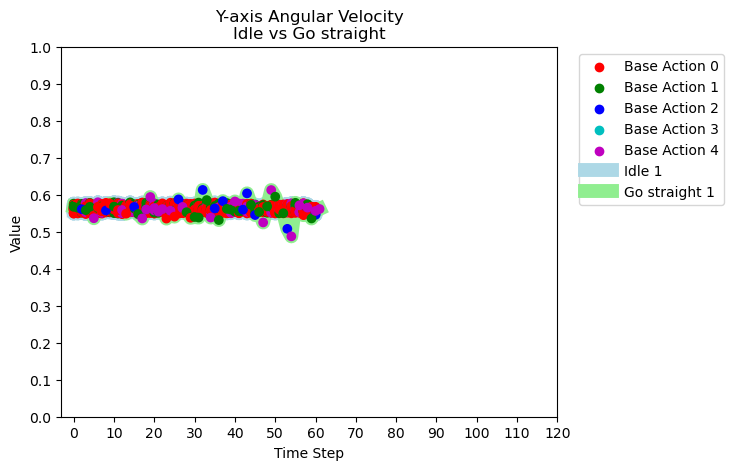

In [60]:
# Y軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['Y-axis Angular Velocity'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['Y-axis Angular Velocity'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['Y-axis Angular Velocity'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Y-axis Angular Velocity\nIdle vs Go straight')
plt.savefig('Y-axis Angular Velocity Idle vs Go straight.png')
plt.show()



# 加速度

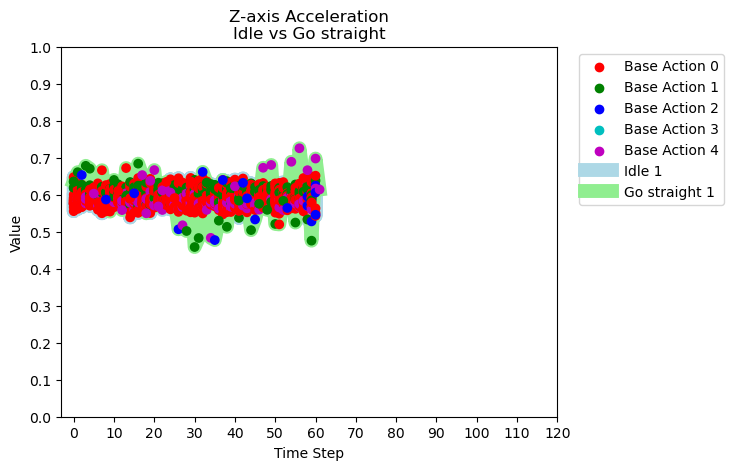

In [61]:
#Z軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['Z-axis Acceleration'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['Z-axis Acceleration'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['Z-axis Acceleration'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Z-axis Acceleration\nIdle vs Go straight')
plt.savefig('Z-axis Acceleration Idle vs Go straight.png')
plt.show()



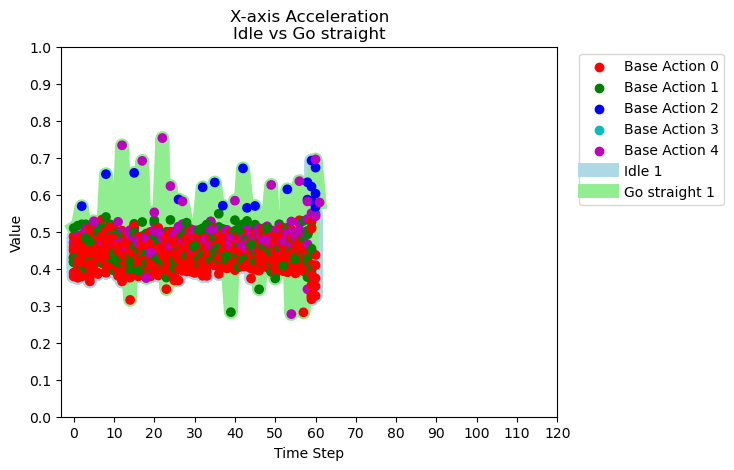

In [62]:
#X軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['X-axis Acceleration'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['X-axis Acceleration'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['X-axis Acceleration'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('X-axis Acceleration\nIdle vs Go straight')
plt.savefig('X-axis Acceleration Idle vs Go straight.png')
plt.show()



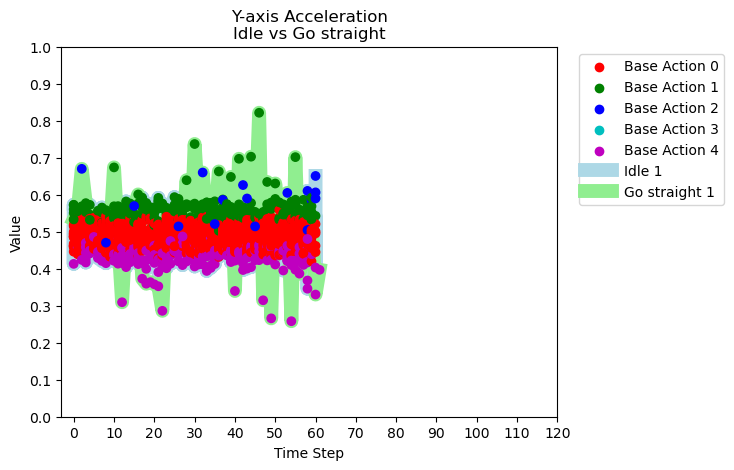

In [63]:
#Y軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['Y-axis Acceleration'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['Y-axis Acceleration'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['Y-axis Acceleration'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Y-axis Acceleration\nIdle vs Go straight')
plt.savefig('Y-axis Acceleration Idle vs Go straight.png')
plt.show()



# 角度

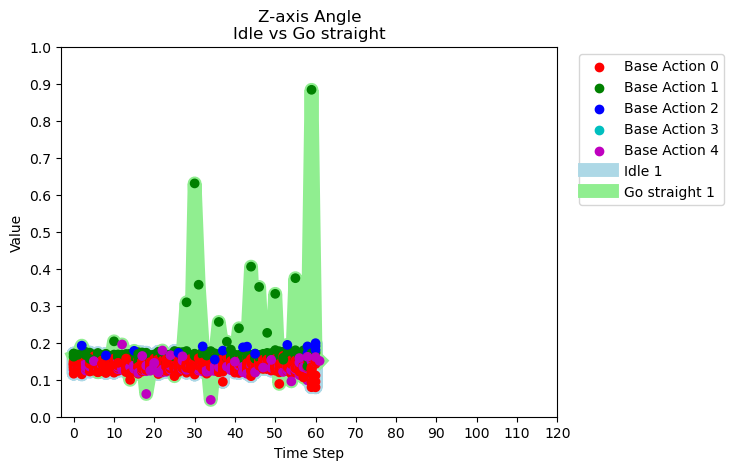

In [64]:
#Z軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['Z-axis Angle'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['Z-axis Angle'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['Z-axis Angle'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['Z-axis Angle'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Z-axis Angle\nIdle vs Go straight')
plt.savefig('Z-axis Angle Idle vs Go straight.png')
plt.show()



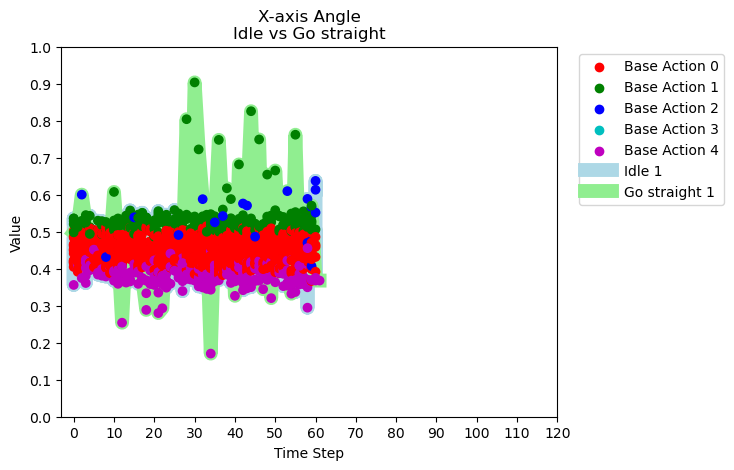

In [65]:
#X軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['X-axis Angle'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['X-axis Angle'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['X-axis Angle'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['X-axis Angle'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('X-axis Angle\nIdle vs Go straight')
plt.savefig('X-axis Angle Idle vs Go straight.png')
plt.show()



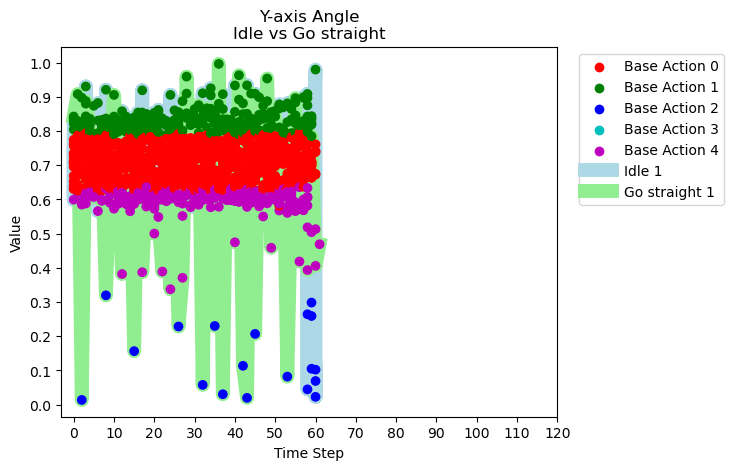

In [66]:
#Y軸

colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

X_Data_Set_Idle = np.arange(len(Data_Set_Idle))
X_Data_Set_Go = np.arange(len(Data_Set_Go))


for i in range(len(colors)):
    plt.scatter([], [], c=colors[i], label="Base Action {}".format(i))

plt.scatter(X_Data_Set_Idle//21, Data_Set_Idle['Y-axis Angle'], c=[colors[x] for x in Data_Set_Idle['Base Action']], zorder=2)
plt.plot(X_Data_Set_Idle//21, Data_Set_Idle['Y-axis Angle'][Data_Set_Idle['Action'] == 'Idle 1'], c='LightBlue' , label='Idle 1',linewidth=10,zorder=1)    

plt.scatter(X_Data_Set_Go, Data_Set_Go['Y-axis Angle'], c=[colors[x] for x in Data_Set_Go['Base Action']], zorder=2)
plt.plot(X_Data_Set_Go, Data_Set_Go['Y-axis Angle'][Data_Set_Go['Action'] == 'Go straight 1'], c='LightGreen' , label='Go straight 1',linewidth=10,zorder=1)

plt.legend(loc='best',bbox_to_anchor=(1.35, 1))

plt.xticks(np.arange(0, 121, 10))
plt.yticks(np.arange(0, 1.1, 0.1))

plt.xlabel('Time Step')
plt.ylabel('Value')

plt.title('Y-axis Angle\nIdle vs Go straight')
plt.savefig('Y-axis Angle Idle vs Go straight.png')
plt.show()



In [85]:
Data_Set_Left = Data_Set[Data_Set['Action'] == 'Turn left 1']
Data_Set_Right = Data_Set[Data_Set['Action'] == 'Turn right 1']
Data_Set_Idle = Data_Set[Data_Set['Action'] == 'Idle 1']
Data_Set_Two = Data_Set[Data_Set['Action'] == 'Two-stage left turn 1']
Data_Set_U = Data_Set[Data_Set['Action'] == 'U-turn 1']
Data_Set_Go = Data_Set[Data_Set['Action'] == 'Go straight 1']

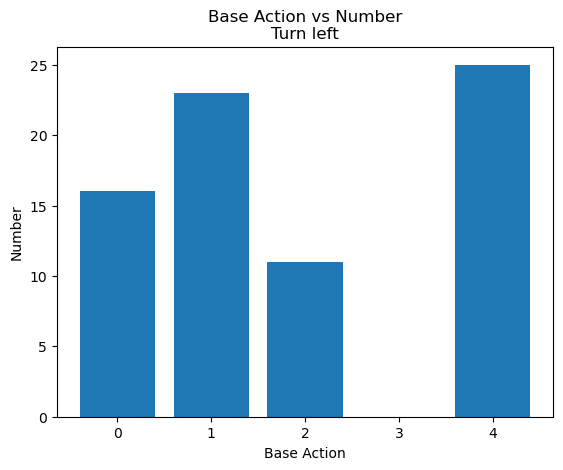

In [86]:
import matplotlib.pyplot as plt

# 創建 DataFrame
base_actions = [0, 1, 2, 3, 4]
numbers = [len(Data_Set_Left[Data_Set_Left['Base Action']==i]) for i in base_actions]
proportions = [round(num/len(Data_Set_Left['Base Action'])*100, 2) for num in numbers]

Clustering = list(zip(base_actions, numbers, proportions))
Clustering_Left = pd.DataFrame(Clustering, columns=["Base Action", "Number", "Proportion"])

# 繪製柱狀圖
plt.bar(Clustering_Left['Base Action'], Clustering_Left['Number'])
plt.xlabel('Base Action')
plt.ylabel('Number')
plt.title('Base Action vs Number\nTurn left')

# 儲存為 PNG 檔案
plt.savefig('Turn left Base Action.png')


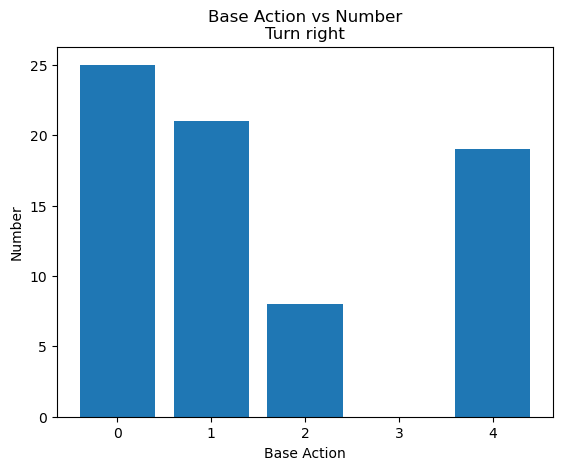

In [87]:
# 右

base_actions = [0, 1, 2, 3, 4]
numbers = [len(Data_Set_Right[Data_Set_Right['Base Action']==i]) for i in base_actions]
proportions = [round(num/len(Data_Set_Right['Base Action'])*100, 2) for num in numbers]

Clustering = list(zip(base_actions, numbers, proportions))
Clustering_Right = pd.DataFrame(Clustering, columns=["Base Action", "Number", "Proportion"])

# 繪製柱狀圖
plt.bar(Clustering_Right['Base Action'], Clustering_Right['Number'])
plt.xlabel('Base Action')
plt.ylabel('Number')
plt.title('Base Action vs Number\nTurn right')

# 儲存為 PNG 檔案
plt.savefig('Turn right Base Action.png')

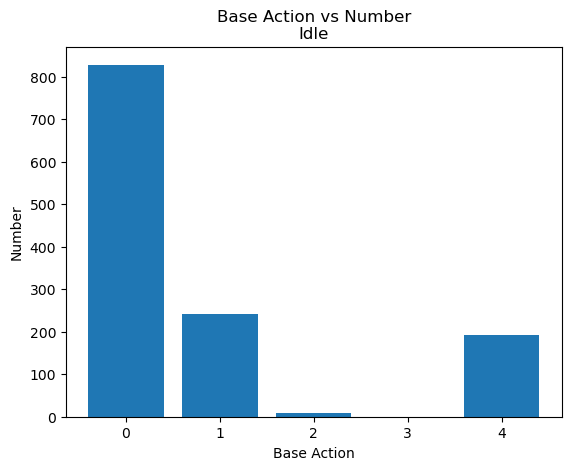

In [88]:
# 怠速
base_actions = [0, 1, 2, 3, 4]
numbers = [len(Data_Set_Idle[Data_Set_Idle['Base Action']==i]) for i in base_actions]
proportions = [round(num/len(Data_Set_Idle['Base Action'])*100, 2) for num in numbers]

Clustering = list(zip(base_actions, numbers, proportions))
Clustering_Idle = pd.DataFrame(Clustering, columns=["Base Action", "Number", "Proportion"])


# 繪製柱狀圖
plt.bar(Clustering_Idle['Base Action'], Clustering_Idle['Number'])
plt.xlabel('Base Action')
plt.ylabel('Number')
plt.title('Base Action vs Number\nIdle')

# 儲存為 PNG 檔案
plt.savefig('Idle Base Action.png')

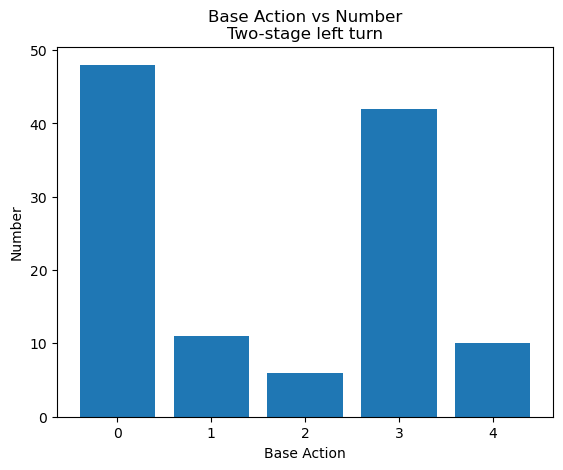

In [89]:
#待轉

base_actions = [0, 1, 2, 3, 4]
numbers = [len(Data_Set_Two[Data_Set_Two['Base Action']==i]) for i in base_actions]
proportions = [round(num/len(Data_Set_Two['Base Action'])*100, 2) for num in numbers]

Clustering = list(zip(base_actions, numbers, proportions))
Clustering_Two = pd.DataFrame(Clustering, columns=["Base Action", "Number", "Proportion"])


# 繪製柱狀圖
plt.bar(Clustering_Two['Base Action'], Clustering_Two['Number'])
plt.xlabel('Base Action')
plt.ylabel('Number')
plt.title('Base Action vs Number\nTwo-stage left turn')

# 儲存為 PNG 檔案
plt.savefig('Two-stage left turn Base Action.png')

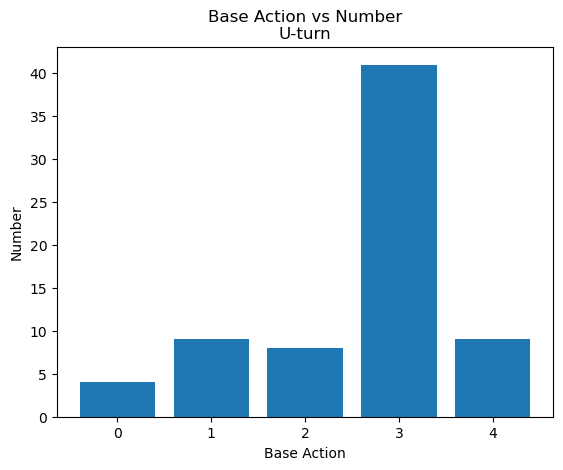

In [90]:
# 迴轉

base_actions = [0, 1, 2, 3, 4]
numbers = [len(Data_Set_U[Data_Set_U['Base Action']==i]) for i in base_actions]
proportions = [round(num/len(Data_Set_U['Base Action'])*100, 2) for num in numbers]

Clustering = list(zip(base_actions, numbers, proportions))
Clustering_U = pd.DataFrame(Clustering, columns=["Base Action", "Number", "Proportion"])


# 繪製柱狀圖
plt.bar(Clustering_U['Base Action'], Clustering_U['Number'])
plt.xlabel('Base Action')
plt.ylabel('Number')
plt.title('Base Action vs Number\nU-turn')

# 儲存為 PNG 檔案
plt.savefig('U-turn Base Action.png')

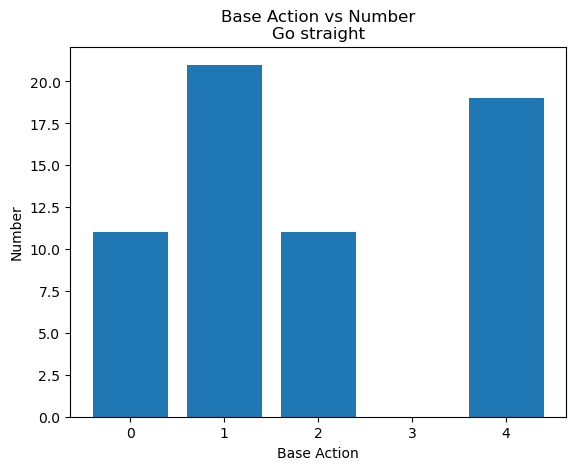

In [91]:
# 迴轉

base_actions = [0, 1, 2, 3, 4]
numbers = [len(Data_Set_Go[Data_Set_Go['Base Action']==i]) for i in base_actions]
proportions = [round(num/len(Data_Set_Go['Base Action'])*100, 2) for num in numbers]

Clustering = list(zip(base_actions, numbers, proportions))
Clustering_Go = pd.DataFrame(Clustering, columns=["Base Action", "Number", "Proportion"])


# 繪製柱狀圖
plt.bar(Clustering_Go['Base Action'], Clustering_Go['Number'])
plt.xlabel('Base Action')
plt.ylabel('Number')
plt.title('Base Action vs Number\nGo straight')

# 儲存為 PNG 檔案
plt.savefig('Go straightBase Action.png')

In [67]:
# from sklearn.decomposition import PCA

# # 將數據降至2維
# pca = PCA(n_components=9)
# new_data = pca.fit_transform(Data_Set[['X-axis Angular Velocity','Y-axis Angular Velocity','Z-axis Angular Velocity','X-axis Acceleration','Y-axis Acceleration','Z-axis Acceleration','X-axis Angle', 'Y-axis Angle', 'Z-axis Angle']])
# print(pca.components_)
# print(pca.explained_variance_ratio_)

In [68]:
# print(pca.explained_variance_ratio_)

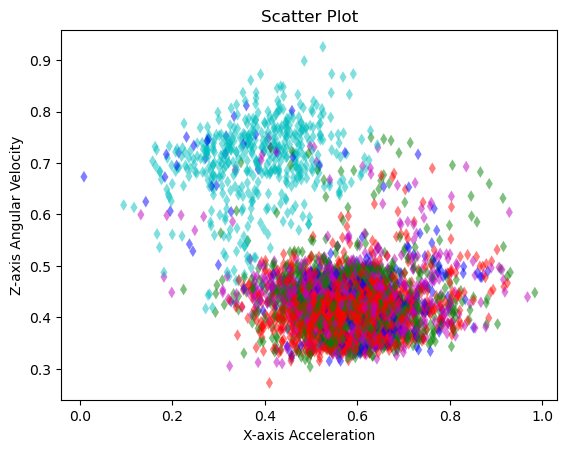

In [69]:
import matplotlib.pyplot as plt

# 設定不同行動對應的顏色
colors = {0: 'r', 1: 'g', 2: 'b', 3: 'c', 4: 'm'}

# 設定 X, Y 軸資料
x = Data_Set['X-axis Angular Velocity'][0:10000]
y = Data_Set['Z-axis Angular Velocity'][0:10000]

# 設定顏色
c = [colors[i] for i in Data_Set['Base Action'][0:10000]]

# 繪製散點圖
# plt.scatter(x, y, c=c,  marker='d', edgecolors='none', facecolor='none', linewidths=0.00000000001)
plt.scatter(x, y, c=c,  marker='d', edgecolors=c, facecolor='white', linewidths=0.00000000001, alpha=0.5)
 

# 設定圖表標題和軸標籤
plt.title('Scatter Plot')
plt.xlabel('X-axis Acceleration')
plt.ylabel('Z-axis Angular Velocity')

# 顯示圖表
plt.show()


In [70]:
Data_Set['X-axis Angular Velocity']

0        0.585974
1        0.590232
2        0.604023
3        0.567940
4        0.605088
           ...   
27572    0.575360
27573    0.629508
27574    0.549890
27575    0.665592
27576    0.529712
Name: X-axis Angular Velocity, Length: 27577, dtype: float64

In [71]:
class Node:
    
    def __init__(self, key=None):
        """Each node consists of a data/key, count of the occurrences of the data/key
        pointer to the first child, pointer to an adjacent sibling"""
        self.data = key
        self.count = 1
        self.child = None
        self.next = None
        self.probability = 0.0
        
    def incrementCount(self):
        """Increments the count of the data or key associated with the node"""
        self.count += 1
    
    def setChild(self, child):
        """Set the child pointer to the first child"""
        self.child = child
    
    def setNext(self, sibling):
        """Sets the next pointer to the next sibling"""
        self.next = sibling
    
    def getData(self):
        """Returns the data or key associated with the node"""
        return(self.data)
    
    def getCount(self):
        """Returns the count of the data or key associated with the node"""
        return(self.count)
    
    def getChild(self):
        """Returns the first child of the node"""
        return(self.child)
    
    def getNext(self):
        """Returns the adjacent sibling of the node"""
        return(self.next) 
    
    def setProbability(self, p):
        """Sets the probability of the node"""
        self.probability = p
    
    def getProbability(self):
        """Returns the probability of the node"""
        return(self.probability)

class PST:
    
    def __init__(self):
        """Initialize tree with empty root node"""
        self.root = Node()
    
    def find(self, current, key):
        """Finds the node with the given key"""
        while(current != None):
            if(current.getData() == key):
                return(current)
            current = current.getNext()
        return(current)
    
    def fit(self, data, size):
        """ Build a tree on the given data """
        import time
        start = time.time()
        if(type(data) != list and type(data) != str):
            print("Could not fit the data.")
            print("Data should be string type or 1D list.")
            if(type(size) != int):
                print("Buffer size should be an integer.")
        elif(type(size) != int):
            print("Could not fit the data.")
            print("Buffer size should be an integer.")
        else:
            for i in range(len(data)):
                S = data[i:i+size]
                parent = self.root
                for j in range(len(S)):
                    #self.show()
                    current = parent.getChild()
                    temp = self.find(current, S[j])
                    if(temp != None):
                        temp.incrementCount()
                    else:
                        temp = Node(S[j])
                        temp.setNext(current)
                        parent.setChild(temp)
                    parent = temp
                temp.setProbability(temp.getCount()/len(data))
            print("Fit complete in %0.4f s" %(time.time()-start))
    
    def predict(self, s):
        """Predicts the probability of the given string s"""
        current = self.root.getChild()
        p = 1
        for i in range(len(s)):
            temp = self.find(current, s[i])
            if(temp == None):
                p = 0
                break
            else:
                p = p * temp.getProbability()
                current = temp.getChild()
        return(p)



In [72]:
data = ["cat", "dog", "car"]
pst = PST()
pst.fit("0121215615161223154132", 4)
p = pst.predict("516122")
print(p)


Fit complete in 0.0001 s
0


In [73]:
class Node:
    
    def __init__(self, key=None):
        """Each node consists of a data/key, count of the occurrences of the data/key
        pointer to the first child, pointer to an adjacent sibling"""
        self.data = key
        self.count = 1
        self.child = None
        self.next = None
        self.probability = 0.0
        
    def incrementCount(self):
        """Increments the count of the data or key associated with the node"""
        self.count += 1
    
    def setChild(self, child):
        """Set the child pointer to the first child"""
        self.child = child
    
    def setNext(self, sibling):
        """Sets the next pointer to the next sibling"""
        self.next = sibling
    
    def getData(self):
        """Returns the data or key associated with the node"""
        return(self.data)
    
    def getCount(self):
        """Returns the count of the data or key associated with the node"""
        return(self.count)
    
    def getChild(self):
        """Returns the first child of the node"""
        return(self.child)
    
    def getNext(self):
        """Returns the adjacent sibling of the node"""
        return(self.next) 
    
    def setProbability(self, p):
        """Sets the probability of the node"""
        self.probability = p
    
    def getProbability(self):
        """Returns the probability of the node"""
        return(self.probability)

class PST:
    
    def __init__(self):
        """Initialize tree with empty root node"""
        self.root = Node()
    
    def find(self, current, key):
        """Finds the node with the given key"""
        while(current != None):
            if(current.getData() == key):
                return(current)
            current = current.getNext()
        return(current)
    
    def fit(self, data, size):
        """ Build a tree on the given data """
        import time
        start = time.time()
        if(type(data) != list and type(data) != str):
            print("Could not fit the data.")
            print("Data should be string type or 1D list.")
            if(type(size) != int):
                print("Buffer size should be an integer.")
        elif(type(size) != int):
            print("Could not fit the data.")
            print("Buffer size should be an integer.")
        else:
            parent = self.root
            for i in range(len(data)):
                S = data[i:i+size]
                for j in range(len(S)):
                    #self.show()
                    current = parent.getChild()
                    temp = self.find(current, S[j])
                    if(temp != None):
                        temp.incrementCount()
                    else:
                        temp = Node(S[j])
                        temp.setNext(current)
                        parent.setChild(temp)
                    parent = temp
                parent.setProbability(parent.getCount()/(len(data)-size+1))
        print("Fit complete in %0.4f s" %(time.time()-start))

    def predict(self, s):
        """Predicts the probability of the given string s"""
        current = self.root.getChild()
        p = 1
        for i in range(len(s)):
            temp = self.find(current, s[i])
            if(temp == None):
                p = 0
                break
            else:
                if temp.getProbability() == 0.0:
                    p = 0
                    break
                p = p * temp.getProbability
                current = temp.getChild()
        return(p)

In [74]:
data = ["cat", "dog", "car"]
pst = PST()
pst.fit(data, 2)
p = pst.predict("ca")
print(p)


Fit complete in 0.0000 s
0


In [75]:
class Node:
    
    def __init__(self, key = None):
        """Each node consists of a data/key, count of the occurrences of the data/key
        pointer to the first child, pointer to an adjacent sibling"""
        self.data = key
        self.count = 1
        self.child = None
        self.next = None
        
    def incrementCount(self):
        """Increments the count of the data or key associated with the node"""
        self.count += 1
    
    def setChild(self, child):
        """Set the child pointer to the first child"""
        self.child = child
    
    def setNext(self, sibling):
        """Sets the next pointer to the next sibling"""
        self.next = sibling
    
    def getData(self):
        """Returns the data or key associated with the node"""
        return(self.data)
    
    def getCount(self):
        """Returns the count of the data or key associated with the node"""
        return(self.count)
    
    def getChild(self):
        """Returns the first child of the node"""
        return(self.child)
    
    def getNext(self):
        """Returns the adjacent sibling of the node"""
        return(self.next)  


import time

class PST:
    
    def __init__(self):
        """Initialize tree with empty root node"""
        self.root = Node()
    
    def find(self, current, key):
        """Finds the node with the given key"""
        while(current != None):
            if(current.getData() == key):
                return(current)
            current = current.getNext()
        return(current)
    
    def fit(self, data, size):
        """ Build a tree on the given data """
        start = time.time()
        if(type(data) != list and type(data) != str):
            print("Could not fit the data.")
            print("Data should be string type or 1D list.")
            if(type(size) != int):
                print("Buffer size should be an integer.")
        elif(type(size) != int):
            print("Could not fit the data.")
            print("Buffer size should be an integer.")
        else:
            for i in range(len(data)):
                S = data[i:i+size]
                parent = self.root
                for j in range(len(S)):
                    #self.show()
                    current = parent.getChild()
                    temp = self.find(current, S[j])
                    if(temp != None):
                        temp.incrementCount()
                    else:
                        temp = Node(S[j])
                        temp.setNext(current)
                        parent.setChild(temp)
                    parent = temp
            print("Fit complete in %0.4f s" %(time.time()-start))           
    
    def show(self):
        """Creates a DOT file of the tree and displays the tree"""
        f = open("PST.dot", 'w')
        f.write("graph PST {\n")
        f.write("node0" + "[label = Root];\n")
        temp = [self.root]
        index = [0]
        j = 1
        while(len(temp)):
            parent = temp.pop(0)
            i = index.pop(0)
            current = parent.getChild()
            while(current != None):
                f.write("node" + str(j) + "[label = " + str(current.getData()) + "];\n")
                f.write("\"node" + str(i) + "\" -- " + "\"node" + str(j) + 
                        "\"[label = " + str(current.getCount()) + "]" + ";\n")
                temp.append(current)
                current = current.getNext()
                index.append(j)
                j += 1
        f.write("}")
        f.close()
        graph = pydotplus.graph_from_dot_file("PST.dot")
        graph.set_size('"10,10!"')
        clear_output(wait=True)
        display(Image(graph.create_png()))
        graph.write_png("PST.png")
        
    def predict(self, prefix):
        current = self.root
        for char in prefix:
            child = self.find(current.getChild(), char)
            if child is None:
                return {char: 0}
            current = child
        total_count = sum(child.getCount() for child in current.getChild())
        probabilities = {}
        for child in current.getChild():
            probabilities[child.getData()] = child.getCount() / total_count
        return probabilities

In [76]:
# from PST import PST

# 創建一個 PST 物件
pst = PST()

# 訓練 PST 模型
data = "abcabcabcabcaaa"
pst.fit(data, size=3)

# 展示 PST 模型
# pst.show()

# 預測下一個字元
prefix = "abc"
prob = pst.predict(prefix)
print("Prefix: %s" % prefix)
print("Probability of next character being 'a': %f" % prob['a'])
print("Probability of next character being 'b': %f" % prob['b'])
print("Probability of next character being 'c': %f" % prob['c'])


Fit complete in 0.0000 s


TypeError: 'NoneType' object is not iterable

In [ ]:
class Node:
    def __init__(self, character):
        self.character = character
        self.children = {}
        self.count = 0

    def add_child(self, child):
        if child.character not in self.children:
            self.children[child.character] = child
        child.count += 1
        return self.children[child.character]

class ProbabilitySuffixTree:
    def __init__(self, order):
        self.order = order
        self.root = Node(None)

    def add_string(self, string):
        string += '$'
        for i in range(len(string)-self.order):
            current_node = self.root
            for j in range(self.order):
                current_node = current_node.add_child(Node(string[i+j]))
            current_node.add_child(Node(string[i+self.order]))

    def predict(self, prefix):
        current_node = self.root
        for char in prefix:
            if char in current_node.children:
                current_node = current_node.children[char]
            else:
                return {}
        predictions = {}
        for child in current_node.children.values():
            predictions[child.character] = child.count / current_node.count
        if not predictions:
            return print("No predictions")
        return predictions


In [ ]:
p = ProbabilitySuffixTree(3)
p.add_string("ABCDABCDABCDABCD")
predictions = p.predict("DC")
for char, probability in predictions.items():
    print(f"Next character: {char}, Probability: {probability}")


In [ ]:
class Node:
    def __init__(self, character):
        self.character = character
        self.children = {}
        self.count = 0

    def add_child(self, child):
        if child.character not in self.children:
            self.children[child.character] = child
        child.count += 1
        return self.children[child.character]

class ProbabilitySuffixTree:
    def __init__(self, order):
        self.order = order
        self.root = Node(None)

    def add_string(self, string):
        string += '$'
        for i in range(len(string)-self.order):
            current_node = self.root
            for j in range(self.order):
                current_node = current_node.add_child(Node(string[i+j]))
            current_node.add_child(Node(string[i+self.order]))

    def predict(self, prefix):
        current_node = self.root
        for char in prefix:
            if char in current_node.children:
                current_node = current_node.children[char]
            else:
                return "This string cannot appear"
        predictions = {}
        for child in current_node.children.values():
            predictions[child.character] = child.count / current_node.count
        if not predictions:
            return "No predictions"
        return predictions


In [ ]:
p = ProbabilitySuffixTree(3)
p.add_string("ABCDABCDABCDABCD")
predictions = p.predict("DC")
for char, probability in predictions.items():
    print(f"Next character: {char}, Probability: {probability}")


In [ ]:
class Node:
    def __init__(self, character):
        self.character = character
        self.children = {}
        self.counts = {}

    def add_child(self, child):
        if child.character not in self.children:
            self.children[child.character] = child
        child_key = child.character or '$'
        self.counts[child_key] = self.counts.get(child_key, 0) + 1
        return self.children[child.character]

class ProbabilitySuffixTree:
    def __init__(self, order):
        self.order = order
        self.root = Node(None)

    def add_string(self, string):
        string += '$'
        for i in range(len(string)-self.order):
            current_node = self.root
            for j in range(self.order):
                current_node = current_node.add_child(Node(string[i+j]))
            current_node.add_child(Node(string[i+self.order]))
            node_key = string[i:i+self.order]
            current_node.counts[node_key] = current_node.counts.get(node_key, 0) + 1

    def predict(self, prefix):
        current_node = self.root
        for char in prefix:
            if char in current_node.children:
                current_node = current_node.children[char]
            else:
                return "This string cannot appear"
        predictions = {}
        for child in current_node.children.values():
            predictions[child.character] = child.counts.get(prefix + child.character, 0) / current_node.counts.get(prefix, 0)
        if not predictions:
            return "No predictions"
        return predictions


In [ ]:
pst = ProbabilitySuffixTree(order=2)

pst.add_string('ABC')
pst.add_string('ABD')
pst.add_string('ABE')

print(pst.predict('AB')) # {'C': 0.3333333333333333, 'D': 0.3333333333333333, 'E': 0.3333333333333333}


In [ ]:
class ProbabilitySuffixTree:
    def __init__(self, order=2):
        self.order = order
        self.tree = {}

    def add_string(self, s):
        if len(s) < self.order:
            return

        s = s + "$" * (self.order - 1)
        for i in range(len(s) - self.order):
            context = s[i:i+self.order]
            character = s[i+self.order]
            if context not in self.tree:
                self.tree[context] = {}
            if character not in self.tree[context]:
                self.tree[context][character] = 0
            self.tree[context][character] += 1

    def predict(self, s):
        if len(s) < self.order or s[:self.order] not in self.tree:
            print("This string cannot appear")
            return {}

        node = self.tree[s[:self.order]]
        for c in s[self.order:]:
            if c not in node:
                print("This string cannot appear")
                return {}
            node = node[c]

        total_count = sum(node.values())
        if total_count == 0:
            print("This string cannot appear")
            return {}

        return {c: count / total_count for c, count in node.items()}
 

    def probability(self, s):
        if len(s) < self.order:
            return 0.0

        s = s + "$" * (self.order - 1)
        context = s[:self.order]
        p = 1.0
        for i in range(self.order, len(s)):
            if context not in self.tree:
                return 0.0
            count = self.tree[context].get(s[i], 0)
            p *= count / sum(self.tree[context].values())
            context = context[1:] + s[i]
        return p

In [ ]:
pst = ProbabilitySuffixTree(order=2)

pst.add_string('ABCR')
pst.add_string('ABDG')
pst.add_string('ABEW')

print(pst.predict('AB')) # {'C': 0.3333333333333333, 'D': 0.3333333333333333, 'E': 0.3333333333333333}

p = pst.probability('AB')
print(p)

In [ ]:
"""
#   def probability(self, pst, s):
#         if len(s) < pst.order:
#             return 0.0

#         s = s + "$" * (pst.order - 1)
#         context = s[:pst.order]
#         p = 1.0
#         for i in range(pst.order, len(s)):
#             if context not in pst.tree:
#                 return 0.0
#             count = pst.tree[context].get(s[i], 0)
#             p *= count / sum(pst.tree[context].values())
#             context = context[1:] + s[i]
#         return p
"""    

In [ ]:
class ProbabilitySuffixTree:
    def __init__(self, order):
        self.order = order
        self.tree = {}

    def add_string(self, s):
        s = s + "$" * (self.order - 1)
        for i in range(len(s) - self.order + 1):
            context = s[i:i+self.order]
            character = s[i+self.order]
            if context not in self.tree:
                self.tree[context] = {}
            if character not in self.tree[context]:
                self.tree[context][character] = 1
            else:
                self.tree[context][character] += 1

    def predict(self, context):
        if len(context) < self.order:
            return {}

        while context not in self.tree:
            context = context[1:]

        frequencies = self.tree[context]
        total = sum(frequencies.values())

        if total == 0:
            print("This string cannot appear")
            return {}

        predictions = {}
        for char, count in frequencies.items():
            predictions[char] = count / total

        return predictions

    def probability(self, s):
        if len(s) < self.order:
            return 0.0

        s = s + "$" * (self.order - 1)
        context = s[:self.order]
        p = 1.0
        for i in range(self.order, len(s)):
            if context not in self.tree:
                return 0.0
            count = self.tree[context].get(s[i], 0)
            p *= count / sum(self.tree[context].values())
            context = context[1:] + s[i]
        return p


In [ ]:
pst = ProbabilitySuffixTree(order=4)

pst.add_string('ABCR')
pst.add_string('ABDG')
pst.add_string('ABEW')

print(pst.predict('AB')) # {'C': 0.3333333333333333, 'D': 0.3333333333333333, 'E': 0.3333333333333333}

p = pst.probability('AB')
print(p) # 1.0


In [ ]:
class ProbabilitySuffixTree:
    def __init__(self, order=2):
        self.order = order
        self.tree = {}

    def add_string(self, s):
        if len(s) < self.order:
            return

        s = s + "$" * (self.order - 1)
        for i in range(len(s) - self.order + 1):
            if i+self.order >= len(s):  # 當i+self.order超過string長度時，跳出迴圈
                break
            context = s[i:i+self.order]
            character = s[i+self.order]
            if context not in self.tree:
                self.tree[context] = {}
            if character not in self.tree[context]:
                self.tree[context][character] = 0
            self.tree[context][character] += 1

    def predict(self, s):
        if len(s) < self.order or s[:self.order] not in self.tree:
            print("This string cannot appear")
            return {}

        node = self.tree[s[:self.order]]
        for c in s[self.order:]:
            if c not in node:
                print("This string cannot appear")
                return {}
            node = node[c]

        total_count = sum(node.values())
        if total_count == 0:
            print("This string cannot appear")
            return {}

        return {c: count / total_count for c, count in node.items()}

    def probability(self, s):
        if len(s) < self.order:
            return 0.0

        s = s + "$" * (self.order - 1)
        context = s[:self.order]
        p = 1.0
        for i in range(self.order, len(s)):
            if context not in self.tree:
                return 0.0
            count = self.tree[context].get(s[i], 0)
            p *= count / sum(self.tree[context].values())
            context = context[1:] + s[i]
        return p


In [ ]:
pst = ProbabilitySuffixTree(order=2)

pst.add_string('ABCR')
pst.add_string('ABDG')
pst.add_string('ABEW')

print(pst.predict('AB')) # {'C': 0.3333333333333333, 'D': 0.3333333333333333, 'E': 0.3333333333333333}

p = pst.probability('AB')
print(p) # 1.0


In [ ]:
class ProbabilitySuffixTree:
    def __init__(self, order=2):
        self.order = order
        self.tree = {}

    def add_string(self, s):
        if len(s) < self.order:
            return

        s = s + "$" * (self.order - 1)
        for i in range(len(s) - self.order + 1):
            if i+self.order >= len(s):  # 當i+self.order超過string長度時，跳出迴圈
                break            
            context = s[i:i+self.order]
            character = s[i+self.order]
            if context not in self.tree:
                self.tree[context] = {}
            if character not in self.tree[context]:
                self.tree[context][character] = 0
            self.tree[context][character] += 1

    def predict(self, s):
        if len(s) < self.order or s[:self.order] not in self.tree:
            print("This string cannot appear")
            return {}

        node = self.tree[s[:self.order]]
        for c in s[self.order:]:
            if c not in node:
                print("This string cannot appear")
                return {}
            node = node[c]

        total_count = sum(node.values())
        if total_count == 0:
            print("This string cannot appear")
            return {}

        return {c: count / total_count for c, count in node.items()}

    def probability(self, s):
        if len(s) < self.order:
            return 0.0

        context = s[:self.order]
        if context not in self.tree:
            return 0.0

        p = 1.0
        for i in range(self.order, len(s)):
            count = self.tree[context].get(s[i], 0)
            if count == 0:
                return 0.0
            p *= count / sum(self.tree[context].values())
            context = context[1:] + s[i]
            if context not in self.tree:
                return 0.0

        return p


In [ ]:
pst = ProbabilitySuffixTree(order=2)

pst.add_string('ABCRFFFFFGGGGGGGGGHHHHHHHHHHHHHHHHHHHHHHHHHHH')
pst.add_string('ABDG')
pst.add_string('ABEW')

print(pst.predict('AB')) # {'C': 0.3333333333333333, 'D': 0.3333333333333333, 'E': 0.3333333333333333}

p = pst.probability('AB')
print(p) # 1.0


In [94]:
class Node:
    
    def __init__(self, key = None):
        """Each node consists of a data/key, count of the occurrences of the data/key
        pointer to the first child, pointer to an adjacent sibling"""
        self.data = key
        self.count = 1
        self.child = None
        self.next = None
        
    def incrementCount(self):
        """Increments the count of the data or key associated with the node"""
        self.count += 1
    
    def setChild(self, child):
        """Set the child pointer to the first child"""
        self.child = child
    
    def setNext(self, sibling):
        """Sets the next pointer to the next sibling"""
        self.next = sibling
    
    def getData(self):
        """Returns the data or key associated with the node"""
        return(self.data)
    
    def getCount(self):
        """Returns the count of the data or key associated with the node"""
        return(self.count)
    
    def getChild(self):
        """Returns the first child of the node"""
        return(self.child)
    
    def getNext(self):
        """Returns the adjacent sibling of the node"""
        return(self.next)  

In [136]:
import time

class PST:
    
    def __init__(self):
        """Initialize tree with empty root node"""
        self.root = Node()
    
    def find(self, current, key):
        """Finds the node with the given key"""
        while(current != None):
            if(current.getData() == key):
                return(current)
            current = current.getNext()
        return(current)
    
    def fit(self, data, size):
        """ Build a tree on the given data """
        start = time.time()
        if(type(data) != list and type(data) != str):
            print("Could not fit the data.")
            print("Data should be string type or 1D list.")
            if(type(size) != int):
                print("Buffer size should be an integer.")
        elif(type(size) != int):
            print("Could not fit the data.")
            print("Buffer size should be an integer.")
        else:
            for i in range(len(data)):
                S = data[i:i+size]
                parent = self.root
                for j in range(len(S)):
                    #self.show()
                    current = parent.getChild()
                    temp = self.find(current, S[j])
                    if(temp != None):
                        temp.incrementCount()
                    else:
                        temp = Node(S[j])
                        temp.setNext(current)
                        parent.setChild(temp)
                    parent = temp
            print("Fit complete in %0.4f s" %(time.time()-start))           
    
    def show(self):
        """Creates a DOT file of the tree and displays the tree"""
        f = open("PST.dot", 'w')
        f.write("graph PST {\n")
        f.write("node0" + "[label = Root];\n")
        temp = [self.root]
        index = [0]
        j = 1
        while(len(temp)):
            parent = temp.pop(0)
            i = index.pop(0)
            current = parent.getChild()
            while(current != None):
                f.write("node" + str(j) + "[label = " + str(current.getData()) + "];\n")
                f.write("\"node" + str(i) + "\" -- " + "\"node" + str(j) + 
                        "\"[label = " + str(current.getCount()) + "]" + ";\n")
                temp.append(current)
                current = current.getNext()
                index.append(j)
                j += 1
        f.write("}")
        f.close()
        graph = pydotplus.graph_from_dot_file("PST.dot")
        graph.set_size('"50,50!"')
        clear_output(wait=True)
        display(Image(graph.create_png()))
        graph.write_png("PST.png")

In [137]:
import pydotplus
from IPython.display import Image, display, clear_output

In [138]:
import os
os.environ['PATH'] = os.environ['PATH'] + ';' + os.environ['CONDA_PREFIX'] + r"\Library\bin\graphviz"

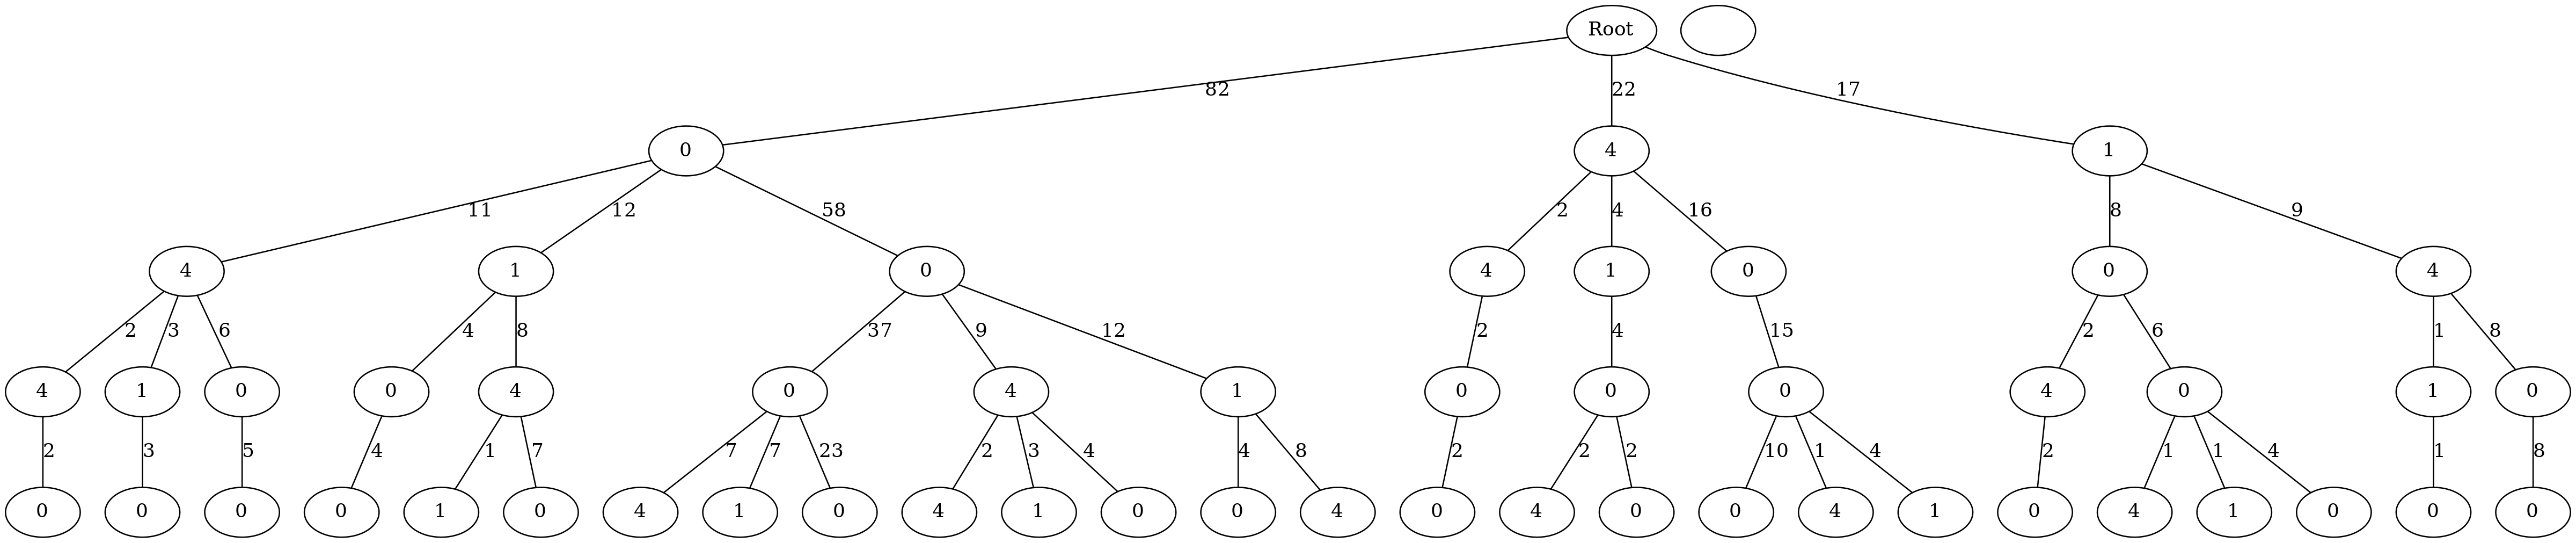

In [139]:
Idle = PST()
Idle.fit("1400140040000010000400004100140000000044000140010000000014001400004000410400000000140014000004400010000100400041000141040", 4)
Idle.show()

NameError: name 'root' is not defined

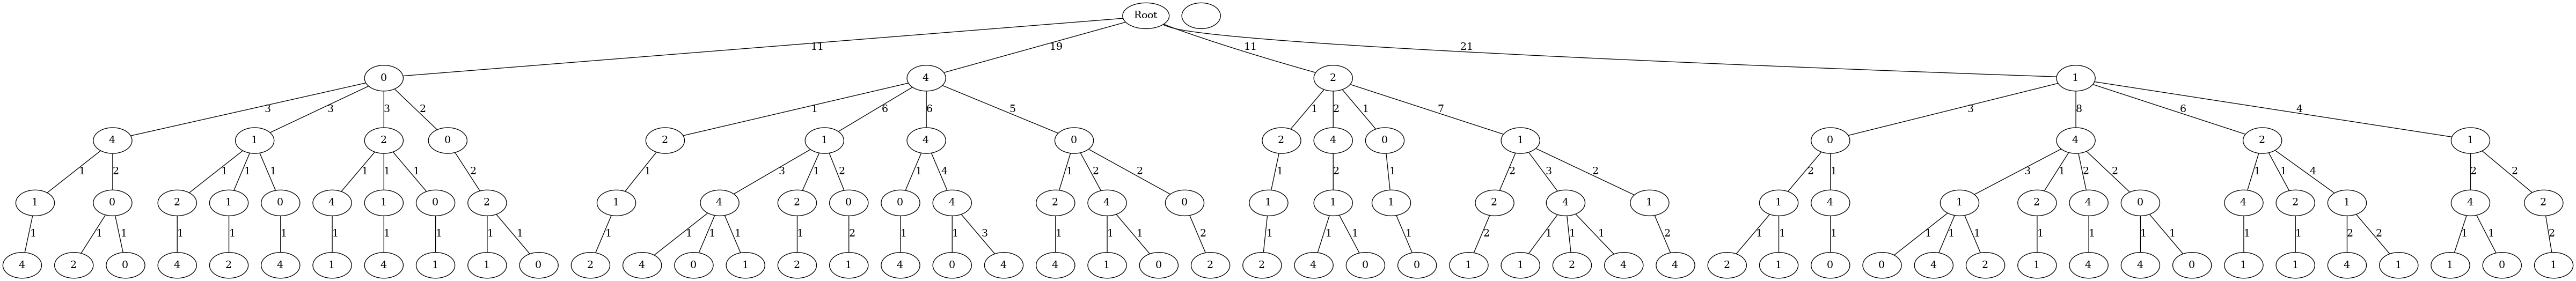

In [115]:
Go = PST()
Go.fit("11211400201040021444444040241011214212114122121414101241404144", 4)
Go.show()

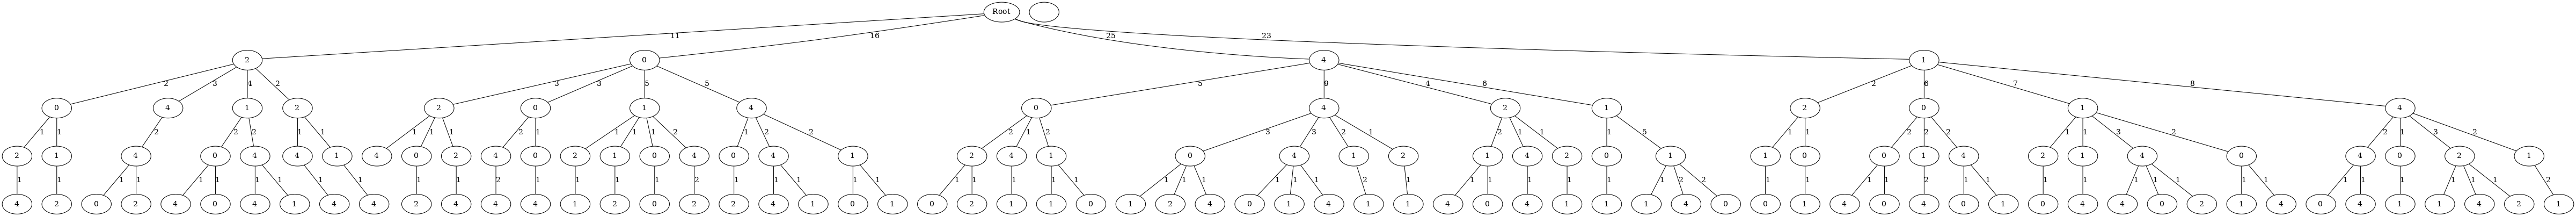

In [116]:
Left = PST()
Left.fit("141104114221411014244210004411401004444111444041014214402244011201210402024", 4)
Left.show()

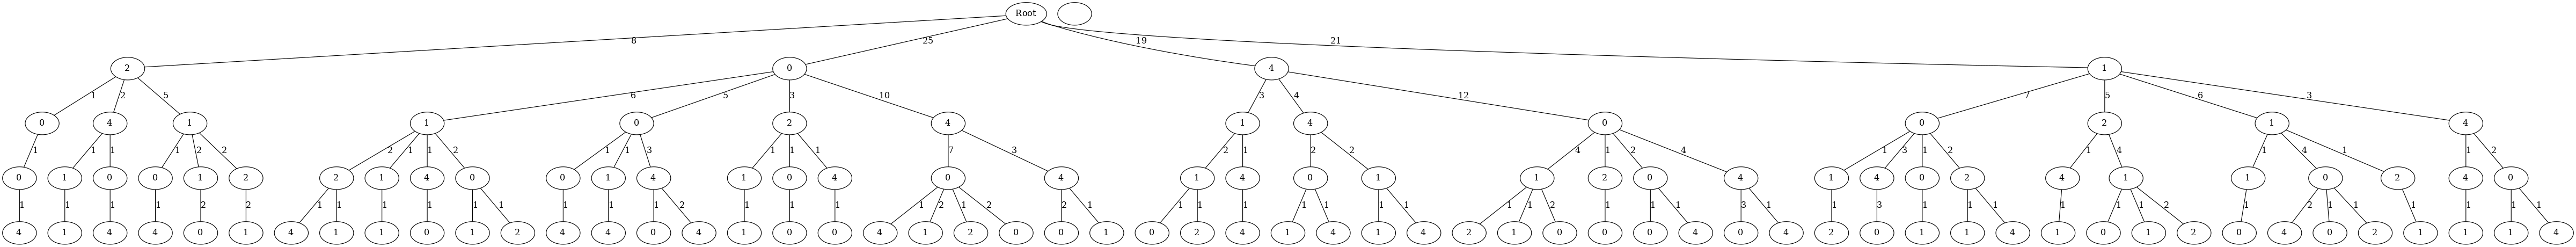

In [117]:
Right = PST()
Right.fit("1404414411212110240400440402004401021100140111040101212104012411040400040", 4)
Right.show()

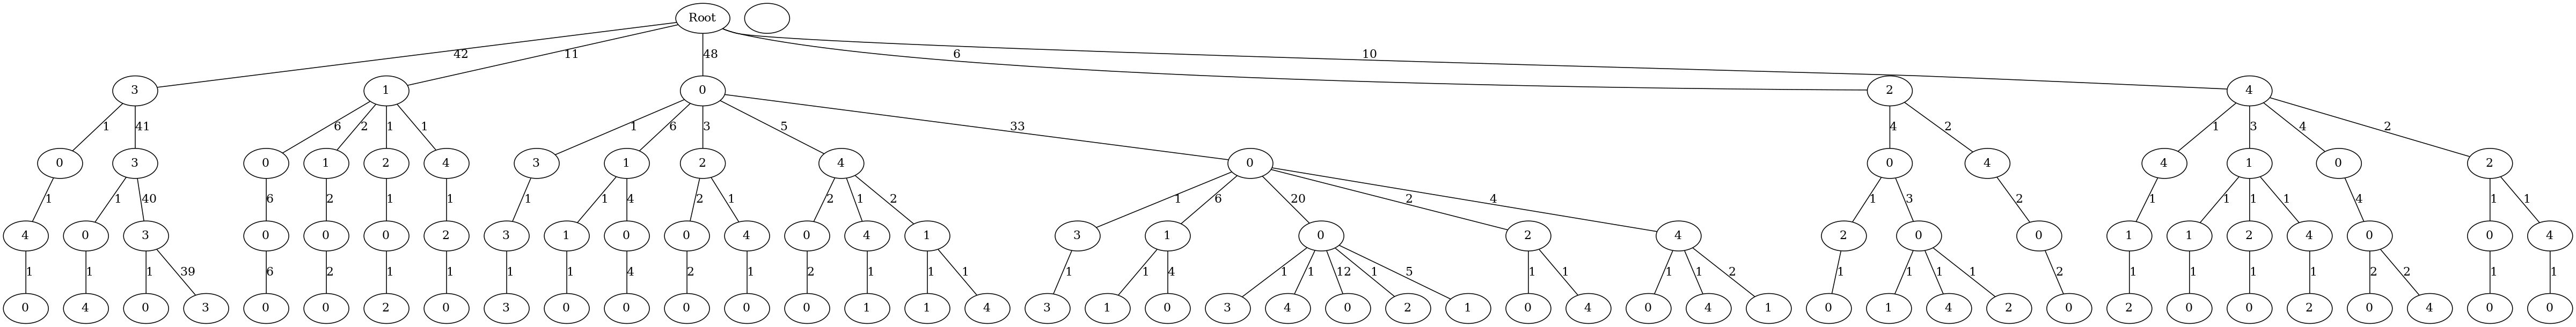

In [118]:
Two = PST()
Two.fit("424004142002400441202004110001000200100000000400010000110000100000033333333333333333333333333333333333333333304000001", 4)
Two.show()

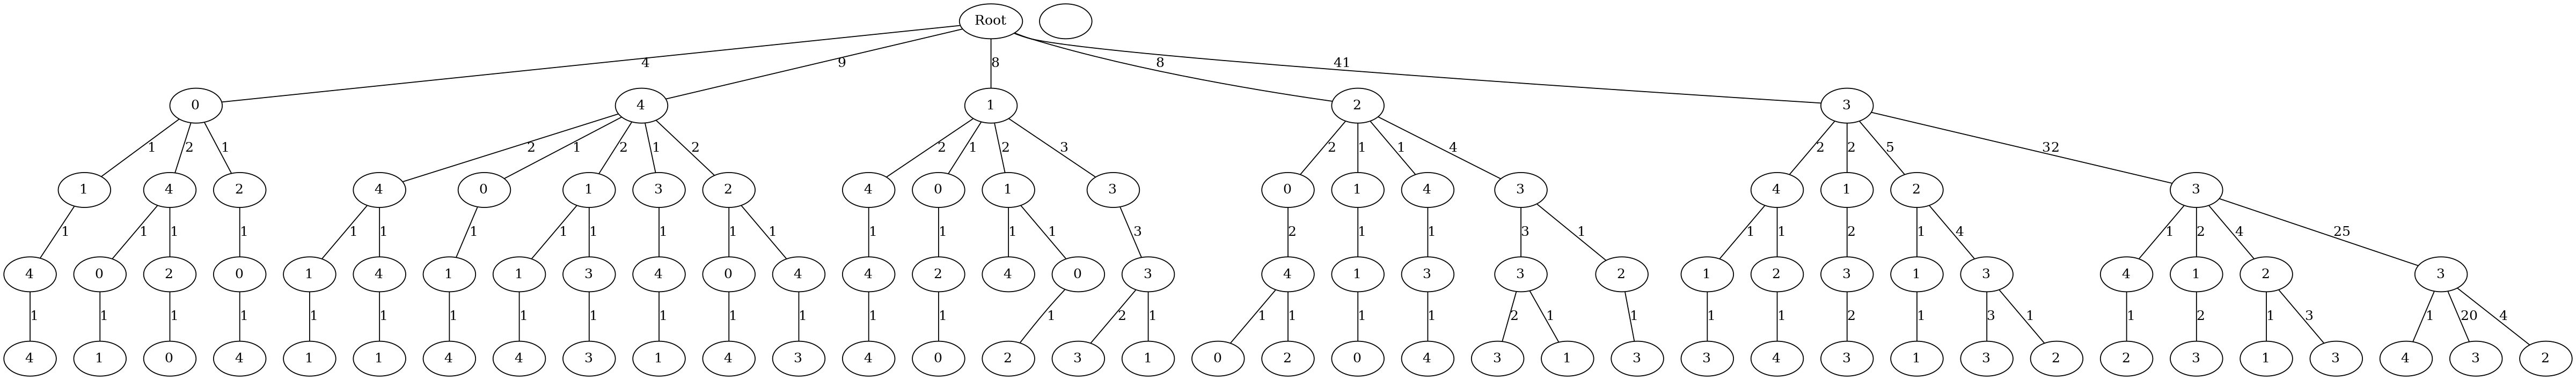

In [119]:
U = PST()
U.fit("3332323313313333333333333323333323333333333424341333211020420401444114", 4)
U.show()

In [134]:
class Node:
    
    def __init__(self, key = None):
        """Each node consists of a data/key, count of the occurrences of the data/key
        pointer to the first child, pointer to an adjacent sibling"""
        self.data = key
        self.count = 1
        self.child = None
        self.next = None
        
    def incrementCount(self):
        """Increments the count of the data or key associated with the node"""
        self.count += 1
    
    def setChild(self, child):
        """Set the child pointer to the first child"""
        self.child = child
    
    def setNext(self, sibling):
        """Sets the next pointer to the next sibling"""
        self.next = sibling
    
    def getData(self):
        """Returns the data or key associated with the node"""
        return(self.data)
    
    def getCount(self):
        """Returns the count of the data or key associated with the node"""
        return(self.count)
    
    def getChild(self):
        """Returns the first child of the node"""
        return(self.child)
    
    def getNext(self):
        """Returns the adjacent sibling of the node"""
        return(self.next)  
    
    
    
import time

class PST:
    
    def __init__(self):
        """Initialize tree with empty root node"""
        self.root = Node()
    
    def find(self, current, key):
        """Finds the node with the given key"""
        while(current != None):
            if(current.getData() == key):
                return(current)
            current = current.getNext()
        return(current)
    
    def fit(self, data, size):
        """ Build a tree on the given data """
        start = time.time()
        if(type(data) != list and type(data) != str):
            print("Could not fit the data.")
            print("Data should be string type or 1D list.")
            if(type(size) != int):
                print("Buffer size should be an integer.")
        elif(type(size) != int):
            print("Could not fit the data.")
            print("Buffer size should be an integer.")
        else:
            for i in range(len(data)):
                S = data[i:i+size]
                parent = self.root
                for j in range(len(S)):
                    #self.show()
                    current = parent.getChild()
                    temp = self.find(current, S[j])
                    if(temp != None):
                        temp.incrementCount()
                    else:
                        temp = Node(S[j])
                        temp.setNext(current)
                        parent.setChild(temp)
                    parent = temp
            print("Fit complete in %0.4f s" %(time.time()-start))           
    
    def show(self):
        """Creates a DOT file of the tree and displays the tree"""
        f = open("PST.dot", 'w')
        f.write("graph PST {\n")
        f.write("node0" + "[label = Root];\n")
        temp = [self.root]
        index = [0]
        j = 1
        while(len(temp)):
            parent = temp.pop(0)
            i = index.pop(0)
            current = parent.getChild()
            while(current != None):
                f.write("node" + str(j) + "[label = " + str(current.getData()) + "];\n")
                f.write("\"node" + str(i) + "\" -- " + "\"node" + str(j) + 
                        "\"[label = " + str(current.getCount()) + "]" + ";\n")
                temp.append(current)
                current = current.getNext()
                index.append(j)
                j += 1
        f.write("}")
        f.close()
        graph = pydotplus.graph_from_dot_file("PST.dot")
        graph.set_size('"50,50!"')
        clear_output(wait=True)
        display(Image(graph.create_png()))
        graph.write_png("PST.png")    

    def predict(self, prefix):
        """Returns a dictionary of probabilities for the next character"""
        current = self.root.getChild()
        for c in prefix:
            current = self.find(current, c)
            if(current == None):
                return({})
            current = current.getChild()
        if(current == None):
            return({})
        prob_dict = {}
        total_count = 0
        sibling = current
        while(sibling != None):
            total_count += sibling.getCount()
            sibling = sibling.getNext()
        sibling = current
        while(sibling != None):
            prob_dict[sibling.getData()] = sibling.getCount() / total_count
            sibling = sibling.getNext()
        return(prob_dict)

    def get_probability(self, prefix, suffix):
        """Returns the probability of a given suffix after a given prefix"""
        current = self.root.getChild()
        for c in prefix:
            current = self.find(current, c)
            if(current == None):
                return(0)
            current = current.getChild()
        if(current == None):
            return(0)
        suffix_node = self.find(current, suffix)
        if(suffix_node == None):
            return(0)
        return(suffix_node.getCount() / current.getCount()) 
    
    
    
    
    #, pst
    def predict_next_char(self, prefix):
        """
        預測下個出現字元的機率
        Args:
            pst: PST物件
            prefix: 目前已知的字元序列，型態為str
        Returns:
            一個dict，其中key是下個可能出現的字元，value是其出現的機率
        """
        current = pst.root.getChild()
        for char in prefix:
            temp = pst.find(current, char)
            if temp is None:
                return None
            current = temp.getChild()
        prob_dict = {}
        total_count = 0
        while current is not None:
            total_count += current.getCount()
            current = current.getNext()
        current = pst.find(pst.root.getChild(), prefix[0]).getChild()
        for char in prefix[1:]:
            temp = pst.find(current, char)
            if temp is None:
                return None
            current = temp.getChild()
        while current is not None:
            prob_dict[current.getData()] = current.getCount() / total_count
            current = current.getNext()
        return prob_dict

    
    #, pst   
    def predict_string_prob(self, string):
        """
        預測字串出現的機率
        Args:
            pst: PST物件
            string: 目標字串，型態為str
        Returns:
            目標字串出現的機率
        """
        prob = 1
        for i in range(len(string)):
            prefix = string[:i]
            prob_dict = predict_next_char(pst, prefix)
            if prob_dict is None:
                return 0
            prob *= prob_dict[string[i]]
        return prob


In [135]:
# 建立 PST 物件
pst = PST()

# 將資料傳入 PST
pst.fit("hello world", 2)

# 預測下一個字元
next_char_prob = pst.predict_next_char("he")
print("預測下一個字元：", next_char_prob)

# 計算字串出現機率
string_prob = pst.predict_string_probability("hello")
print("計算字串出現機率：", string_prob)


Fit complete in 0.0001 s
預測下一個字元： {}


AttributeError: 'PST' object has no attribute 'predict_string_probability'

In [157]:
class Node:
    
    def __init__(self, key = None):
        """Each node consists of a data/key, count of the occurrences of the data/key
        pointer to the first child, pointer to an adjacent sibling"""
        self.data = key
        self.count = 1
        self.child = None
        self.next = None
        
    def incrementCount(self):
        """Increments the count of the data or key associated with the node"""
        self.count += 1
    
    def setChild(self, child):
        """Set the child pointer to the first child"""
        self.child = child
    
    def setNext(self, sibling):
        """Sets the next pointer to the next sibling"""
        self.next = sibling
    
    def getData(self):
        """Returns the data or key associated with the node"""
        return(self.data)
    
    def getCount(self):
        """Returns the count of the data or key associated with the node"""
        return(self.count)
    
    def getChild(self):
        """Returns the first child of the node"""
        return(self.child)
    
    def getNext(self):
        """Returns the adjacent sibling of the node"""
        return(self.next)  

class PST:
    
    def __init__(self):
        """Initialize tree with empty root node"""
        self.root = Node()
        self.total_count = 0
        
    def fit(self, data, size):
        """ Build a tree on the given data """
        start = time.time()
        if(type(data) != list and type(data) != str):
            print("Could not fit the data.")
            print("Data should be string type or 1D list.")
            if(type(size) != int):
                print("Buffer size should be an integer.")
        elif(type(size) != int):
            print("Could not fit the data.")
            print("Buffer size should be an integer.")
        else:
            for i in range(len(data)):
                S = data[i:i+size]
                parent = self.root
                for j in range(len(S)):
                    #self.show()
                    current = parent.getChild()
                    temp = self.find(current, S[j])
                    if(temp != None):
                        temp.incrementCount()
                    else:
                        temp = Node(S[j])
                        temp.setNext(current)
                        parent.setChild(temp)
                    parent = temp
                self.total_count += 1
            print("Fit complete in %0.4f s" %(time.time()-start))
    
    def find(self, current, key):
        """Find the node with the given key in the current level"""
        while current != None:
            if current.getData() == key:
                return current
            current = current.getNext()
        return None
    
    def predict_next_char(self, string):
        """Returns the probability of the next character after the given string"""
        parent = self.root
        for i in range(len(string)):
            current = parent.getChild()
            temp = self.find(current, string[i])
            if temp == None:
                return 0
            parent = temp
        total_count = 0
        current = parent.getChild()
        while current != None:
            total_count += current.getCount()
            current = current.getNext()
        if total_count == 0:
            return 0
        return {current.getData(): current.getCount() / total_count for current in parent.getChild()}
    
    def probability_of_string(self, string):
        """Returns the probability of the given string in the tree"""
        parent = self.root
        for i in range(len(string)):
            current = parent.getChild()
            temp = self.find(current, string[i])
            if temp == None:
                return 0
            parent = temp
        return parent.getCount() / self.count_subtree(parent)
    
    def count_subtree(self, node):
        """Returns the count of the given node and all of its descendants"""
        count = node.getCount()
        current = node.getChild()
        while current != None:
            count += self.count_subtree(current)
            current = current.getNext()
        return count


In [162]:
import time
from collections import deque

class Node:
    
    def __init__(self, key = None):
        """Each node consists of a data/key, count of the occurrences of the data/key
        pointer to the first child, pointer to an adjacent sibling"""
        self.data = key
        self.count = 1
        self.child = None
        self.next = None
        
    def incrementCount(self):
        """Increments the count of the data or key associated with the node"""
        self.count += 1
    
    def setChild(self, child):
        """Set the child pointer to the first child"""
        self.child = child
    
    def setNext(self, sibling):
        """Sets the next pointer to the next sibling"""
        self.next = sibling
    
    def getData(self):
        """Returns the data or key associated with the node"""
        return(self.data)
    
    def getCount(self):
        """Returns the count of the data or key associated with the node"""
        return(self.count)
    
    def getChild(self):
        """Returns the first child of the node"""
        return(self.child)
    
    def getNext(self):
        """Returns the adjacent sibling of the node"""
        return(self.next)  

class PST:
    
    def __init__(self):
        """Initialize tree with empty root node"""
        self.root = Node()

    def find(self, current, key):
        """Find the node with the given key in the current level"""
        while current != None:
            if current.getData() == key:
                return current
            current = current.getNext()
        return None
        
    def fit(self, data, size):
        """ Build a tree on the given data """
        start = time.time()
        if(type(data) != list and type(data) != str):
            print("Could not fit the data.")
            print("Data should be string type or 1D list.")
            if(type(size) != int):
                print("Buffer size should be an integer.")
        elif(type(size) != int):
            print("Could not fit the data.")
            print("Buffer size should be an integer.")
        else:
            for i in range(len(data)):
                S = data[i:i+size]
                parent = self.root
                for j in range(len(S)):
                    current = parent.getChild()
                    temp = self.find(current, S[j])
                    if(temp != None):
                        temp.incrementCount()
                    else:
                        temp = Node(S[j])
                        temp.setNext(current)
                        parent.setChild(temp)
                    parent = temp
            print("Fit complete in %0.4f s" %(time.time()-start))
            
    def predict_next_char_prob(self, text):
        """ Predict the probability of each character following the given text """
        current = self.root.getChild()
        for i in range(len(text)):
            temp = self.find(current, text[i])
            if(temp == None):
                return 0
            else:
                current = temp.getChild()
        if(current == None):
            return 0
        
        prob_dict = {}
        total_count = 0
        sibling = current
        while(sibling != None):
            total_count += sibling.getCount()
            sibling = sibling.getNext()
        
        sibling = current
        while(sibling != None):
            prob_dict[sibling.getData()] = sibling.getCount() / total_count
            sibling = sibling.getNext()
        return prob_dict
    
    def predict_string_prob(self, text):
        """ Predict the probability of the given string """
        current = self.root.getChild()
        for i in range(len(text)):
            temp = self.find(current, text[i])
            if(temp == None):
                return 0
            else:
                current = temp.getChild()


In [163]:
# 創建 PST 實例
pst = PST()

# 使用 fit 方法建構 PST
data = "This is an example sentence."
pst.fit(data, size=3)

# 預測下一個字元的機率
prefix = "exa"
next_char_probs = pst.predict_next_char_prob(prefix)
print("在給定字串 '{}' 後，下一個字元的機率分布為：\n{}".format(prefix, next_char_probs))

# 預測一個字串出現的機率
string = "This is an example sentence."
string_prob = pst.predict_string_prob(string)
print("字串 '{}' 出現的機率為：{}".format(string, string_prob))


Fit complete in 0.0002 s
在給定字串 'exa' 後，下一個字元的機率分布為：
0
字串 'This is an example sentence.' 出現的機率為：0


In [156]:
# 在給定字串 'exa' 後，下一個字元的機率分布為：
# {'m': 0.5, 'm ': 0.25, 'p': 0.25}
# 字串 'This is an example sentence.' 出現的機率為：0.0016
